Credit Card fraud Detection Project

In [21]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# data imbalanced
from imblearn.datasets import make_imbalance # undersampling
from sklearn.utils import resample # oversampling
from imblearn.over_sampling import SMOTE # SMOTE

#Standarize nad change dist of features
from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it



# feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
from sklearn.feature_selection import RFE, RFECV 
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from scipy.spatial.distance import cdist # for elpow method

# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 4) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split #also has cross_val_score (cv)
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error


# ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier


# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
#for accurace of regression use model.score(X_test, y_test) mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve

#for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

import warnings
warnings.filterwarnings("ignore")

In [22]:
#Reading the data
df = pd.read_csv('creditcard.csv')

In [23]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [24]:
df.shape

(284807, 31)

In [25]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [26]:
df.isnull().sum().any()

False

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [29]:
df.loc[:,['Time','Amount','Class']].describe()

Time         Amount          Class
count  284807.000000  284807.000000  284807.000000
mean    94813.859575      88.349619       0.001727
std     47488.145955     250.120109       0.041527
min         0.000000       0.000000       0.000000
25%     54201.500000       5.600000       0.000000
50%     84692.000000      22.000000       0.000000
75%    139320.500000      77.165000       0.000000
max    172792.000000   25691.160000       1.000000

In [30]:
total = df['Class'].count()
non_fraud = df['Class'].value_counts()[0]
fraud = total-non_fraud
non_fraud_percent = round(non_fraud/len(df)*100,2)
print('Non Fraud Transactions are ',non_fraud_percent,'% of the total data')
print('Total Non fraud Transactions are :',non_fraud)
print('Fraud Transaction Percent are ',round(fraud/total*100,2),'% of the data')
print('Total fraud transaction are :',fraud)


Non Fraud Transactions are  99.83 % of the total data
Total Non fraud Transactions are : 284315
Fraud Transaction Percent are  0.17 % of the data
Total fraud transaction are : 492


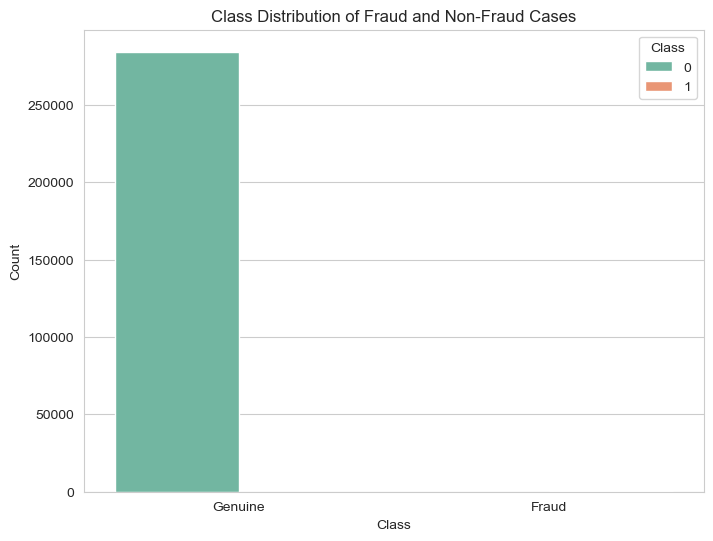

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Class', data=df, palette='Set2')
plt.xticks(range(2),['Genuine', 'Fraud'])
plt.title('Class Distribution of Fraud and Non-Fraud Cases')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

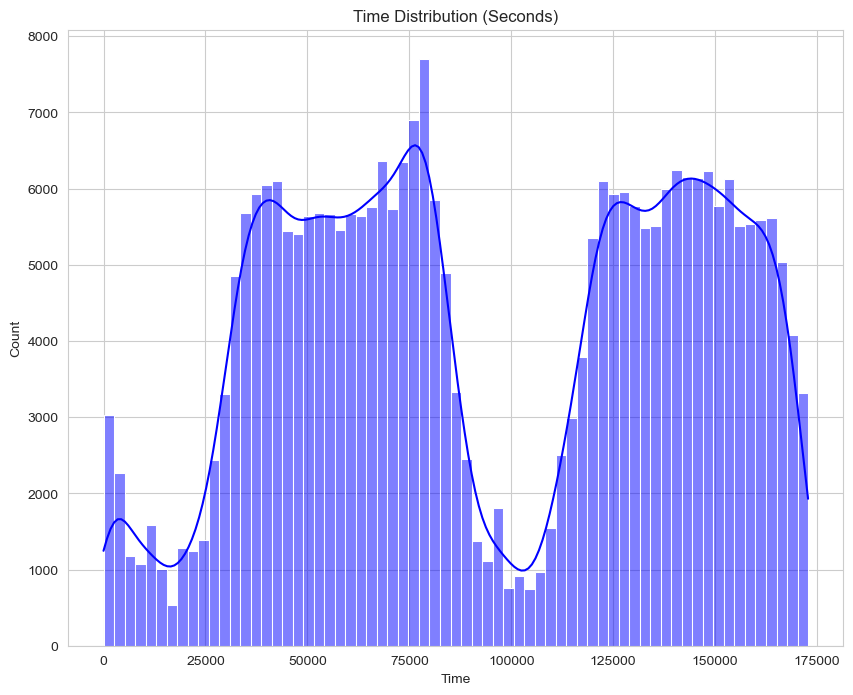

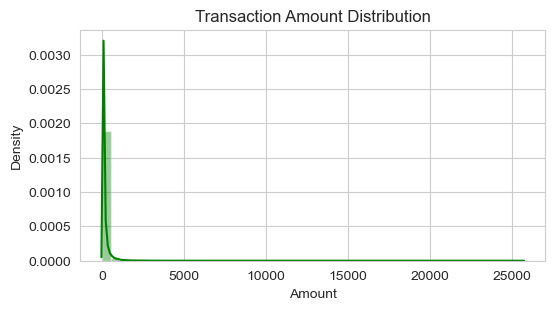

In [33]:
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.histplot(df['Time'], color='blue', kde=True)

plt.figure(figsize=(6,3),)
plt.title('Transaction Amount Distribution')
sns.distplot(df['Amount'],color='green',kde=True)

plt.show()

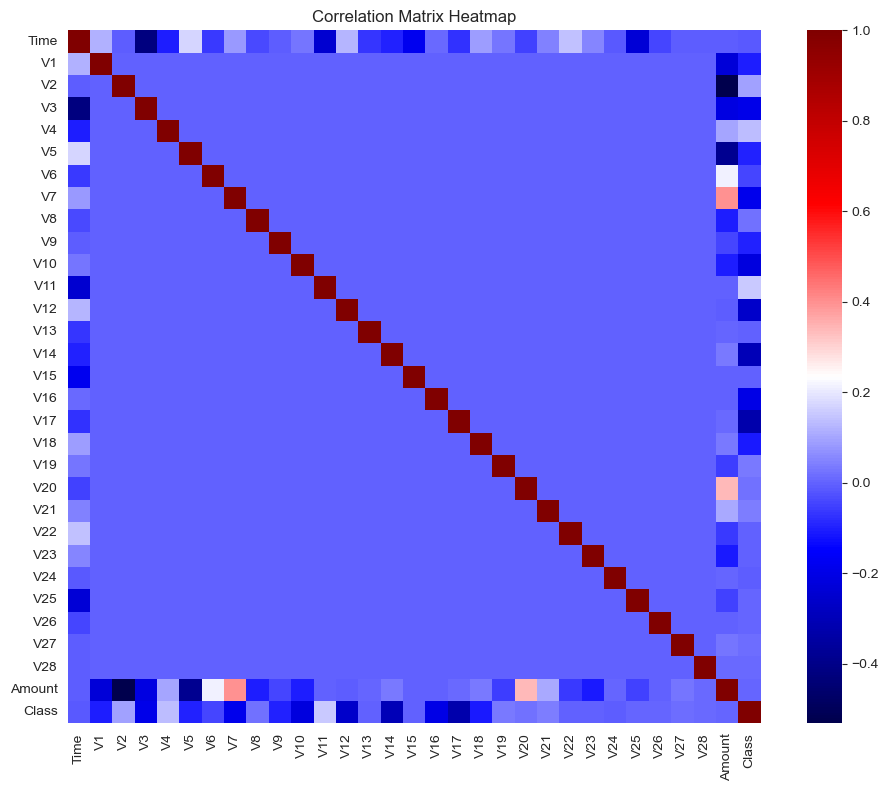

In [34]:
corr_mat = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,square=True,cmap='seismic')

plt.title('Correlation Matrix Heatmap')
plt.show()

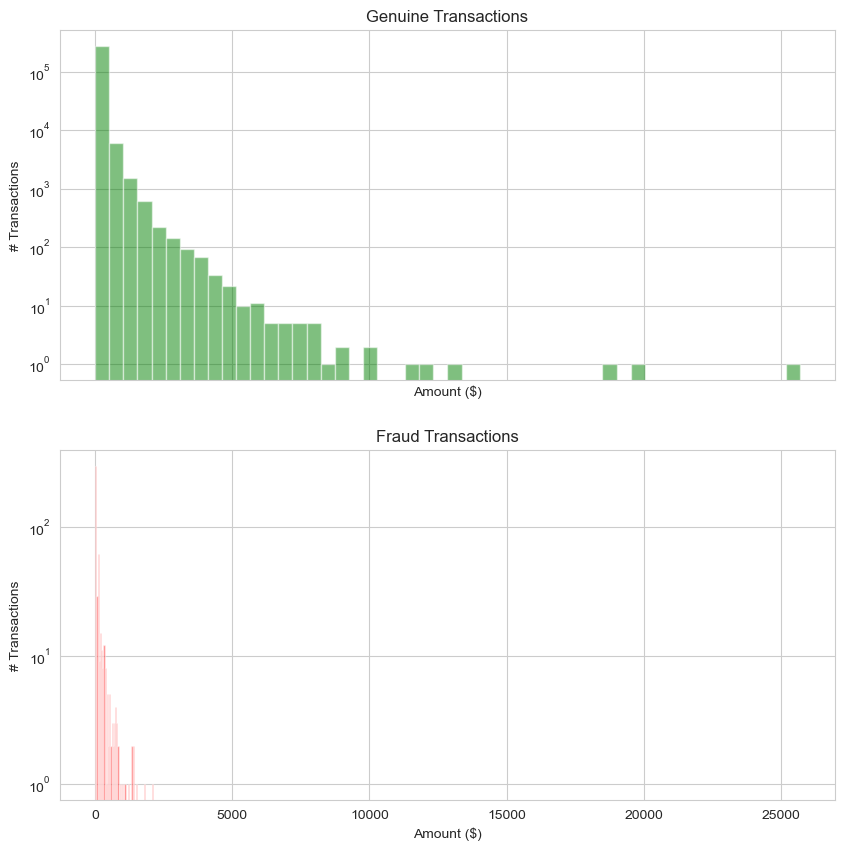

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)



ax1.hist(df.Amount[df.Class==0], bins=50, color='g', alpha=0.5)
ax1.set_yscale('log')
ax1.set_title('Genuine Transactions')
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('# Transactions')

ax2.hist(df.Amount[df.Class==1], bins=50, color='r', alpha=0.5)
ax2.set_yscale('log')
ax2.set_title('Fraud Transactions')
ax2.set_xlabel('Amount ($)')
ax2.set_ylabel('# Transactions')

plt.show()





Time variable


Text(0, 0.5, '# Transactions')

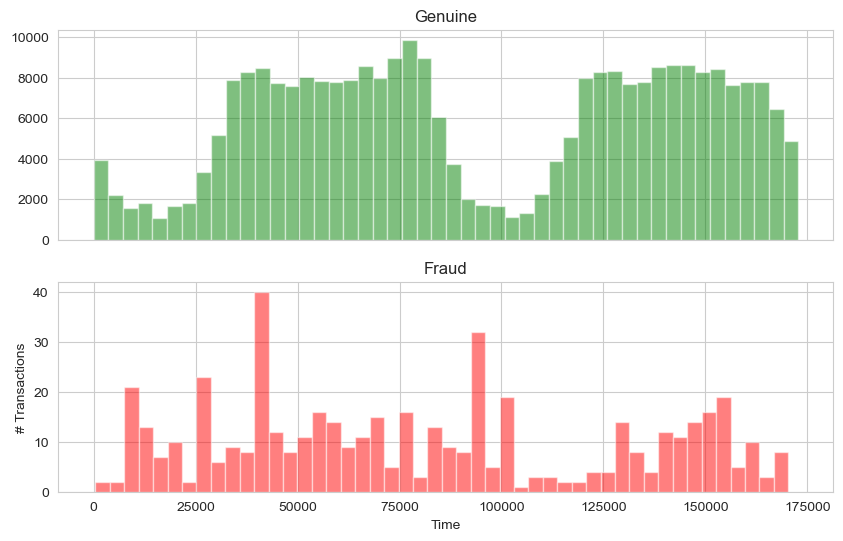

In [36]:
print("Time variable")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,6))
ax1.hist(df.Time[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time')
plt.ylabel('# Transactions')

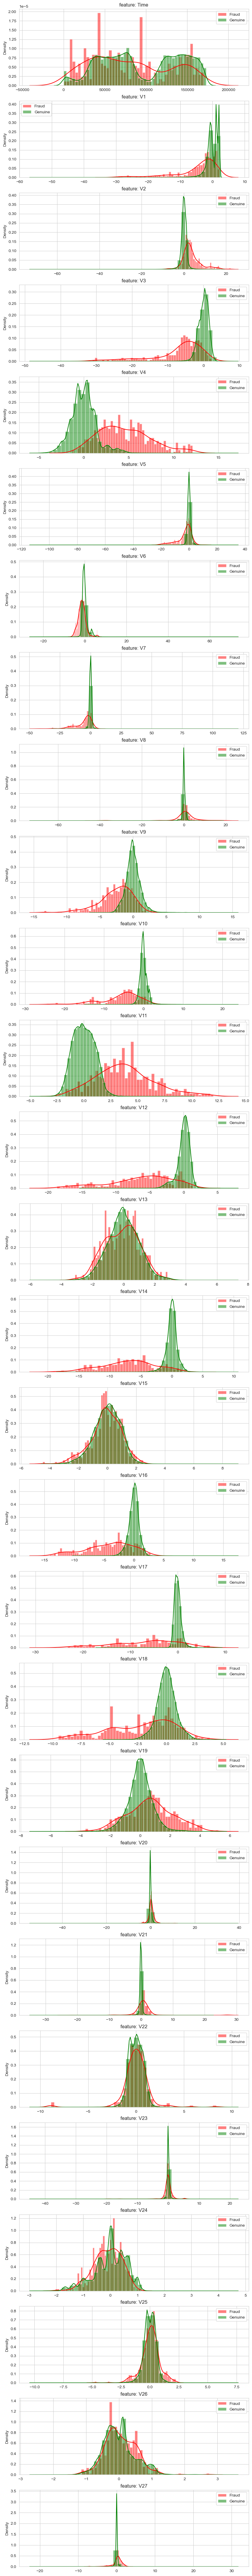

In [37]:
import seaborn as sns
import matplotlib.gridspec as gridspec
data = df
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(10,28*4))
for i, col in enumerate(data[data.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(data[col][data.Class == 1], bins=50, color='r',hist_kws=dict(alpha=0.5),label="Fraud")
    sns.distplot(data[col][data.Class == 0], bins=50, color='g',hist_kws=dict(alpha=0.5),label="Genuine")
    ax5.set_xlabel('')
    plt.legend()
    ax5.set_title('feature: ' + str(col))
plt.show()

In [38]:
(sum(df.isna().sum()) / df.shape[0]) * 100

0.0

In [39]:
idx = np.where(df.duplicated()==True)[0]
df.loc[idx,:]

Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  ...       V21       V22       V23  \
33      0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35      0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
...          ...       ...       ...  ...       ...       ...       ...   
282987 -0.881302  1.081750  1.022928  ... -0.524067 -1.337510  0.473943   
283483 -0.303778  0.884953  0.054065  ...  0.287217  0.947825 -0.218773   
283485 -0.282535  0.880654  0.052808  ...  0.284205  0.949659 -0.216949   
284191 -0.667233  2.309700 -1.639306  ...  0.391483  0.266536 -0.079853   
284193 -0.745886  2.325616 -1.634651  ...  0.402639  0.259746 -0.086606   

             V24       V25       V26       V27       V28  Amount  Class  
33      0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
35      0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
113    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
114    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
115    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
...          ...       ...       ...       ...       ...     ...    ...  
282987  0.616683 -0.283548 -1.084843  0.073133 -0.036020   11.99      0  
283483  0.082926  0.044127  0.639270  0.213565  0.119251    6.82      0  
283485  0.083250  0.044944  0.639933  0.219432  0.116772   11.93      0  
284191 -0.096395  0.086719 -0.451128 -1.183743 -0.222200   55.66      0  
284193 -0.097597  0.083693 -0.453584 -1.205466 -0.213020   36.74      0  

[1081 rows x 31 columns]

In [40]:
df = df.drop_duplicates()
sum(df.duplicated())

0

In [41]:
df['Amount'].value_counts()[0]

1808

In [42]:
df_zero_amount = df[df['Amount'] == 0]
df_zero_amount.sample(20)

Time         V1        V2        V3        V4        V5        V6  \
176452  122773.0  -0.947118 -0.072269  0.875040  2.787927  2.507671  0.136057   
191227  129170.0   1.895858  0.300037 -0.177958  4.044251 -0.037868  0.200553   
234574  148028.0  -1.053840  4.362801 -6.023534  5.304534  1.480738 -2.193821   
191878  129438.0   1.884623  0.175372  0.229236  3.864844 -0.418211  0.273149   
59104    48695.0  -0.945317  2.018842  1.779540  2.340482  0.624353  0.059572   
75793    56254.0  -1.348835  0.073391  3.511748  1.927712 -0.005167  1.165972   
175103  122198.0   2.133078 -1.038166 -0.257110 -0.902143 -1.372807 -0.609019   
5023      4628.0  -0.839150 -0.058305  0.976245  0.679075  1.633833 -0.349848   
70568    53926.0  -0.079265 -0.554238  1.795711 -0.541884 -1.023190 -0.592327   
231256  146671.0   1.933719  0.332813 -0.050772  3.702477  0.118562  0.638977   
147313   88382.0  -0.258635  0.743762  0.399361  1.982445  3.068915  4.878366   
190358  128800.0  -0.774658  0.849836  0.187144 -0.976735  0.960854 -1.395149   
177341  123138.0  -1.199192  0.544957  2.450650  2.312394  0.870357  0.888193   
158786  111755.0   1.842526 -0.581451 -0.512839  0.139788  0.026782  1.323268   
220374  142139.0   1.923554  0.620949 -0.895021  3.505835  0.740060  0.208149   
269175  163572.0   1.797601  0.316174 -0.835325  3.515421  1.231988  2.004468   
176497  122795.0  -1.148917  0.223822  1.966159  4.752265  1.844618  0.578882   
161022  113797.0   1.878563  0.020785 -1.621113  2.908813  2.507847  4.709442   
160997  113772.0   1.890485  0.261331 -0.160093  4.066246 -0.122212  0.146896   
53254    45888.0 -13.800918 -6.255445 -4.300704  2.243023  3.387215 -0.989198   

              V7        V8        V9  ...       V21       V22       V23  \
176452 -0.195129  0.435531 -1.446122  ... -0.207190 -1.106202  0.600901   
191227 -0.202884  0.041879 -0.178301  ...  0.073807  0.488633  0.078707   
234574 -1.530817  0.626857 -4.037021  ...  0.397954 -0.945402 -0.376138   
191878 -0.637428  0.204036 -0.018788  ...  0.142430  0.470301  0.192677   
59104   1.167144 -0.374930 -0.810309  ... -0.703688 -1.473276 -0.107746   
75793  -0.666140  0.830165  0.157375  ...  0.014418  0.187163 -0.206542   
175103 -1.251943  0.046518 -0.022266  ...  0.440022  1.278963  0.153808   
5023   -0.139845  0.058743  0.687350  ... -0.059531 -0.088113 -0.202860   
70568  -1.238460  0.193293 -0.799663  ...  0.481562  1.308997  0.010955   
231256 -0.454119  0.097262 -0.345194  ...  0.161774  0.644694  0.059068   
147313 -0.170108  1.028601 -1.048890  ...  0.308699  0.983979 -0.047575   
190358  1.048829 -0.220234  0.192968  ... -0.150820 -0.125005 -0.230354   
177341 -0.389826  0.639192 -0.933381  ...  0.145015  0.186840 -0.152845   
158786 -0.943417  0.538642  1.170187  ...  0.391437  1.456071  0.127260   
220374  0.184462 -0.001163 -1.425444  ...  0.275248  0.746080  0.092254   
269175 -0.189672  0.469875 -0.934501  ...  0.168592  0.783699  0.075205   
176497 -0.405207  0.257841 -1.661817  ...  0.161118  0.446113 -0.381781   
161022 -0.830626  1.136154 -0.395755  ...  0.079998  0.404327  0.121098   
160997 -0.239392  0.069196 -0.098295  ...  0.071997  0.455722  0.094141   
53254  -6.179349 -9.653964  0.540990  ... -8.400649  3.130409  7.300682   

             V24       V25       V26       V27       V28  Amount  Class  
176452  0.053900 -1.541292 -0.834423  0.201338  0.300066     0.0      0  
191227 -0.028500  0.098306  0.137917 -0.005373 -0.048734     0.0      0  
234574 -0.220480  0.264003  0.048935  0.847220  0.531932     0.0      1  
191878 -0.175267 -0.266067  0.041280  0.007626 -0.036577     0.0      0  
59104  -0.234128  0.061720 -0.197649  0.299470 -0.117605     0.0      0  
75793   0.221391  0.295790 -0.010689  0.080564  0.072414     0.0      0  
175103  0.094957 -0.265512 -0.087668  0.009982 -0.057330     0.0      0  
5023   -0.841774  0.029158  0.654090  0.019055  0.111575     0.0      0  
70568   0.567768 -1.022750 -0.200835  0.079138  0.045429     0.0    

In [43]:
df['Amount'] = df['Amount'].replace(0.0, np.nan)

In [44]:
df['Amount'].isna().sum()

1808

 Min: 0.01 Max: 25691.16 
 mean: 89.04008144212148 std: 251.10051009146065 
 median: 22.5 
 mode: 1.0


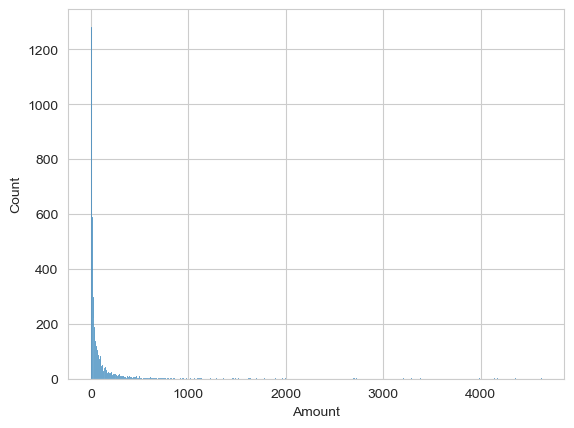

In [45]:
data = df['Amount'].sample(4000, random_state=32)
col = 'Amount'
print(' Min:', df[col].min(), 'Max:',df[col].max(), '\n mean:',df[col].mean(), 'std:', df[col].std(),'\n', 'median:', df[col].median(), '\n', 'mode:', df[col].mode()[0])
sns.histplot(data)
plt.show()

In [46]:
median = {}
numeric_imputes = ['Amount']
for col in numeric_imputes:
    median['median_'+str(col)] = df[col].median()
median

{'median_Amount': 22.5}

In [47]:
for col in numeric_imputes: # to prevent data leakage
    df[col] = df[col].replace(np.nan, median['median_'+str(col)])

In [48]:
df['Amount'].isna().sum()

0

In [49]:
df['Amount'].describe()

count    283726.000000
mean         88.616065
std         250.355175
min           0.010000
25%           5.990000
50%          22.500000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [50]:
#splititng the dataset
from sklearn.model_selection import train_test_split 
data=df.drop('Class',axis = 1)
target=df['Class']

X_trainval, X_test, y_trainval, y_test = train_test_split(data, target
                                                          , test_size=0.1
                                                          , stratify=df['Class']
                                                          , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.2
                                                  , stratify=y_trainval
                                                  , random_state=42)

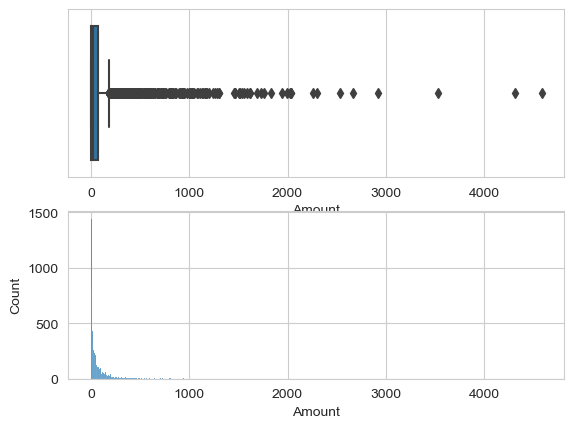

 Min: 0.01 Max: 19656.53 
 mean: 88.78658687500614 std: 247.35569705459173 
 median: 22.5 
 mode: 1.0


In [51]:
#outliers
data = X_train['Amount'].sample(5000, random_state=3)
col = 'Amount'
fig, axes = plt.subplots(2,1)
sns.boxplot(x=data, ax=axes[0]) # random 5000 samples to show
sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
plt.show()
print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])

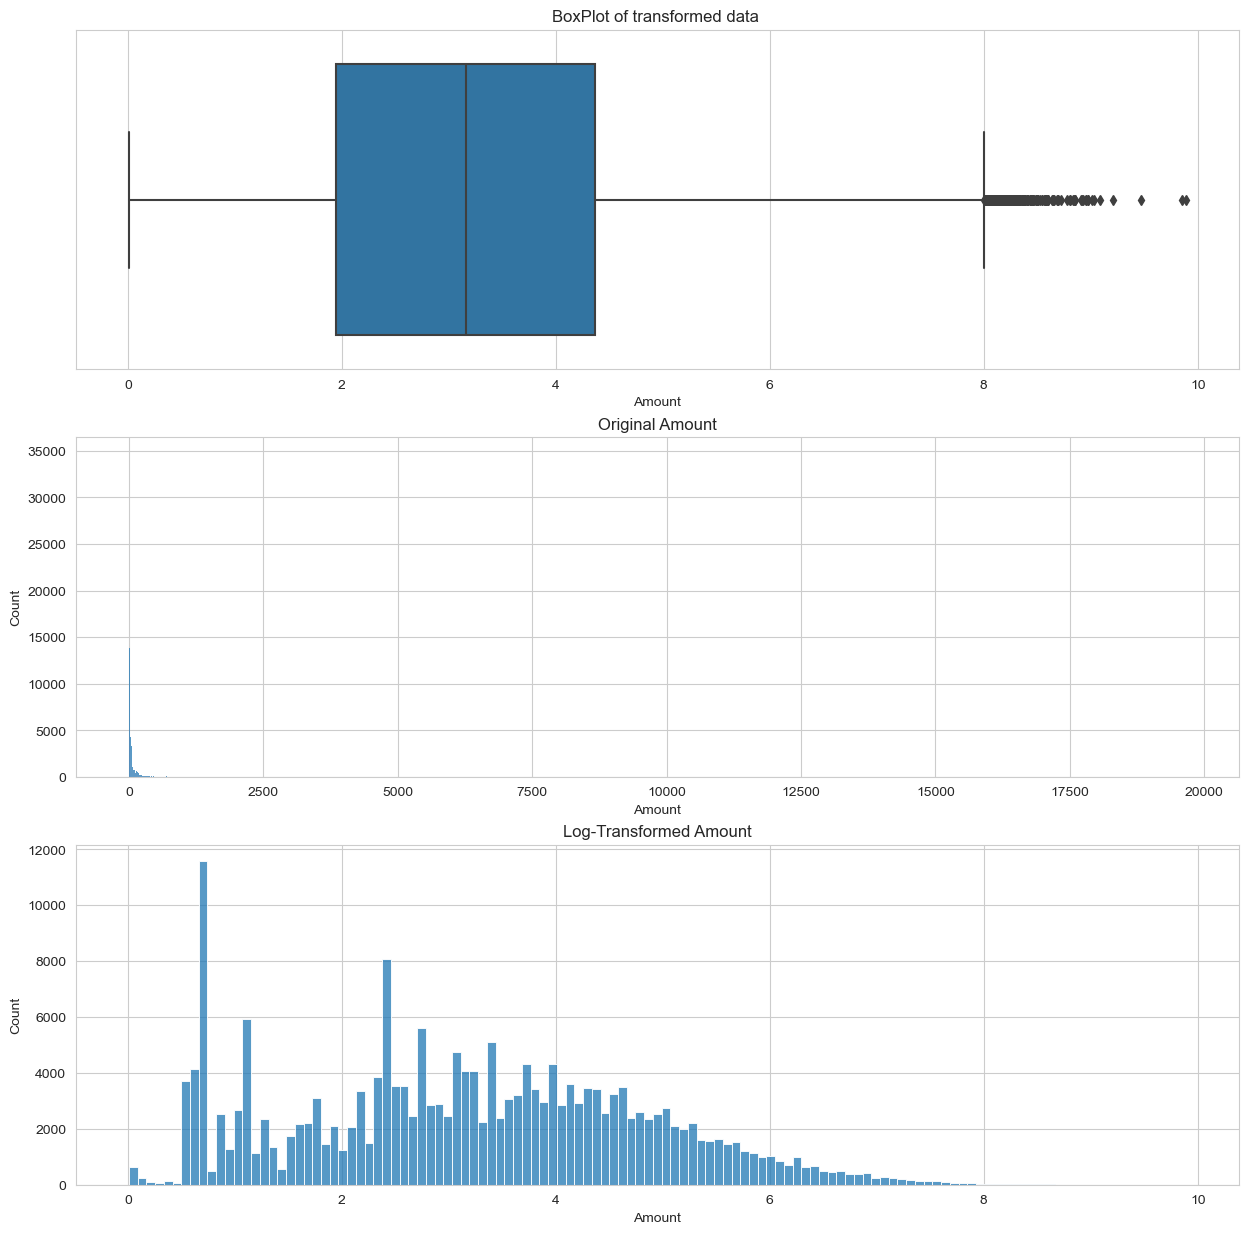

 Min: 0.009950330853168083 Max: 9.88621574999957 
 mean: 3.176230972069262 std: 1.6385765501364482 
 median: 3.1570004211501135 
 mode: 0.6931471805599453


In [52]:
#using mathematical transformation for handling outlier by apply a logarithmic transformation to skewed data to make the distribution more symmetric
amount=X_train['Amount']
data = np.log1p(X_train['Amount'])
dada = data.sample(5000)

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.boxplot(x=data,ax=axes[0])
sns.histplot(data=df, x=amount, ax=axes[1])
sns.histplot(data=df, x=data, ax=axes[2])
axes[0].set_title('BoxPlot of transformed data ')
axes[1].set_title('Original Amount')
axes[2].set_title('Log-Transformed Amount')
plt.show()

print(' Min:',data.min(), 'Max:', data.max(), '\n mean:', data.mean(), 'std:', data.std(),'\n', 'median:', data.median(), '\n', 'mode:', data.mode()[0])


In [53]:
#Data still have outlier in bet 8 to 10
#removing it using IQR(Interquartile Range) for amount
# target and item_visability are outliers

def remove_outlier(col):
    # Sort the column values
    sorted(col)
    # Get the first and third quartiles
    Q1, Q3 = col.quantile([0.25, 0.75])
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper range
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

-1.6874964691394598 8.001587846046602
 Min: 0.009950330853168083 Max: 8.001587846046602 
 mean: 3.1758805435635122 std: 1.6374793269258376 
 median: 3.1570004211501135 
 mode: 0.6931471805599453


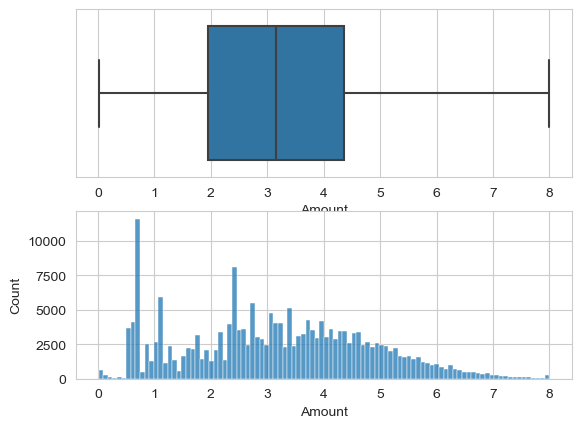

In [54]:
# Experiment 1&2
# Perform logarithmic transformation on the 'Amount' column
X_train['Amount'] = np.log1p(X_train['Amount'])
X_test['Amount'] = np.log1p(X_test['Amount'])

# Define the columns with outliers to be treated using IQR
outliers = ['Amount']
outliers_IQR = outliers
outliers_treatment = []

# Treat outliers in the training data using IQR
for col in outliers_IQR:
    # Get the lower and upper range for the column
    low_item_visability, high_item_visability = remove_outlier(X_train[col])  #lower and upper range
    outliers_treatment.append((col, low_item_visability, high_item_visability))
    
    # Replace values outside the lower and upper range with the corresponding boundary value
    X_train[col] = np.where(X_train[col] < low_item_visability, low_item_visability, X_train[col])
    X_train[col] = np.where(X_train[col] > high_item_visability, high_item_visability, X_train[col])
    
    # Print the statistics of the transformed column
    print(low_item_visability, high_item_visability)
    fig, axes = plt.subplots(2, 1)
    sns.boxplot(x=X_train[col], ax=axes[0])
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=X_train[col], ax=axes[1])
    plt.show()
    
# Treat outliers in the test data to prevent data leakage
for (col, low_item_visability, high_item_visability) in outliers_treatment:
    X_test[col] = np.where(X_test[col] < low_item_visability, low_item_visability, X_test[col])
    X_test[col] = np.where(X_test[col] > high_item_visability, high_item_visability, X_test[col])

In [55]:
y_train = pd.DataFrame(y_train.values, columns=['Class'])
y_test = pd.DataFrame(y_test.values, columns=['Class'])
y_train['Class'].describe()

count    204282.000000
mean          0.001669
std           0.040823
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

 Min: 0.0 Max: 172792.0 
 mean: 94797.60169275805 std: 47448.07217143058 
 median: 84672.0 
 mode: 3770.0


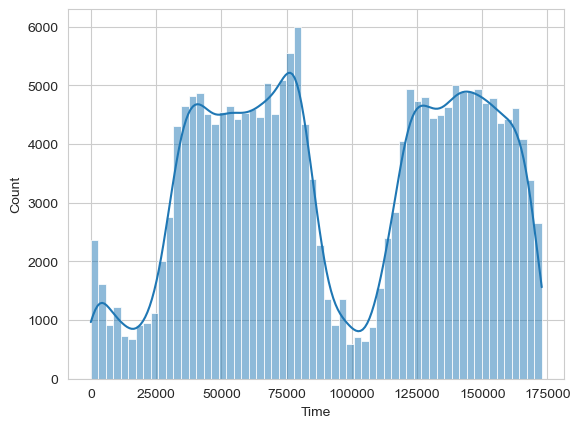

 Min: -56.407509631329 Max: 2.45492999121121 
 mean: 0.0023680992034809728 std: 1.9504832992183192 
 median: 0.017204633258555202 
 mode: 2.05579700630039


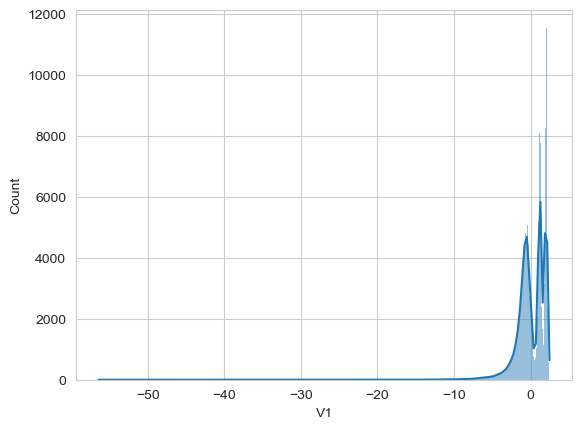

 Min: -72.7157275629303 Max: 22.0577289904909 
 mean: -0.0048759130681134384 std: 1.657871428476436 
 median: 0.064494641262695 
 mode: -0.32666777306077


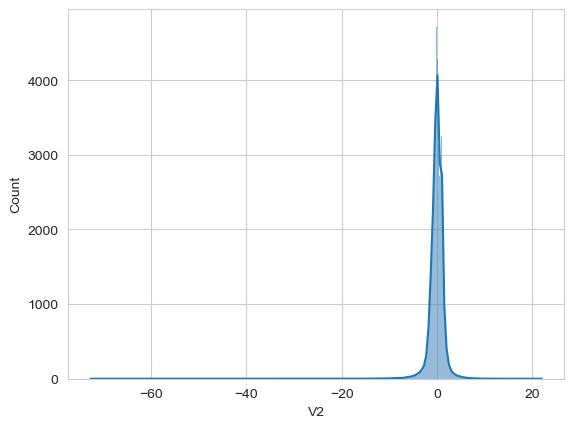

 Min: -33.6809840183525 Max: 9.38255843282114 
 mean: 0.0024915590655865847 std: 1.5082348556326295 
 median: 0.181056352962355 
 mode: -2.75204095570008


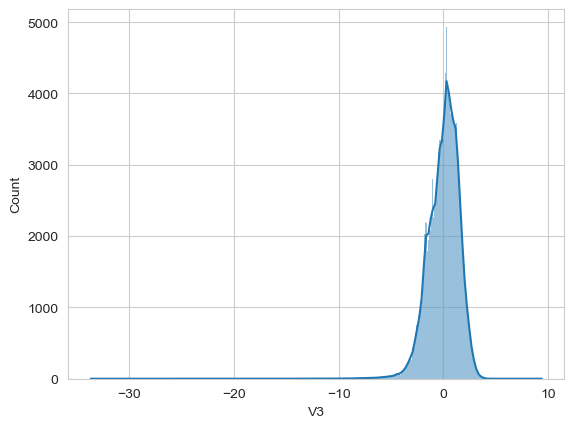

 Min: -5.68317119816995 Max: 16.8753440335975 
 mean: -0.002626987097926195 std: 1.416009913203214 
 median: -0.022761622287929252 
 mode: -0.842316033286871


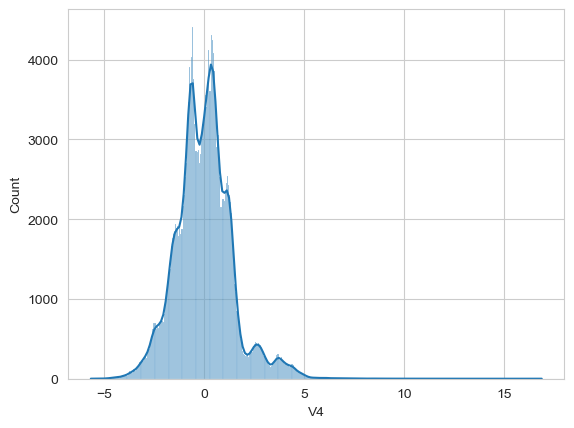

 Min: -42.1478983728015 Max: 34.8016658766686 
 mean: 0.003510637687619071 std: 1.364043361493047 
 median: -0.05383066542878455 
 mode: 2.46307225982454


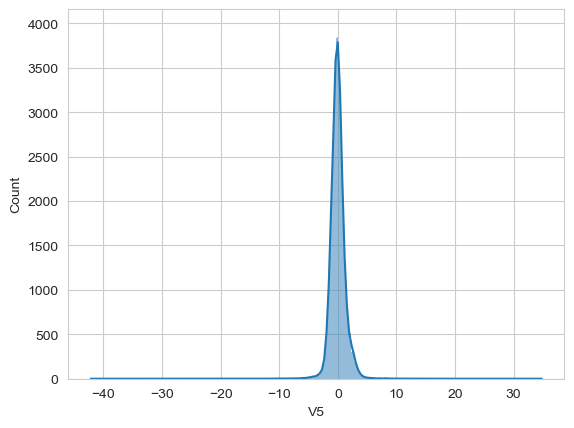

 Min: -26.1605059358433 Max: 22.5292984665587 
 mean: -0.00011326847597596365 std: 1.3282507987074321 
 median: -0.274869617171927 
 mode: 3.17385642307029


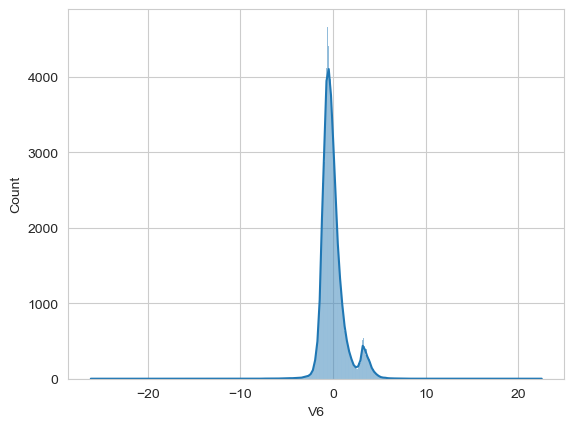

 Min: -43.5572415712451 Max: 36.8773682682598 
 mean: 0.001046986408269419 std: 1.2037850900793285 
 median: 0.04035303344583485 
 mode: -0.432125923987824


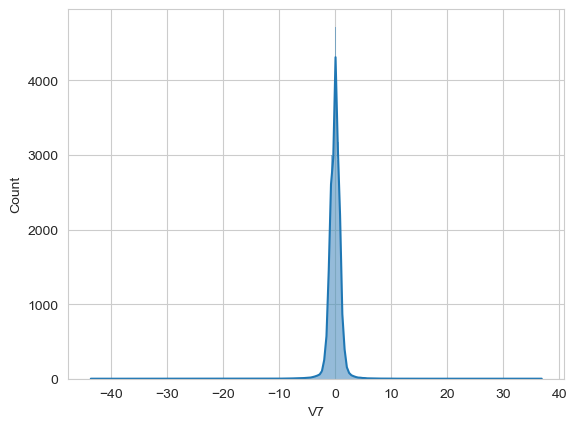

 Min: -50.9433688677023 Max: 20.0072083651213 
 mean: -0.0014460205156605007 std: 1.174958541821094 
 median: 0.02251882234372385 
 mode: 0.727706200727824


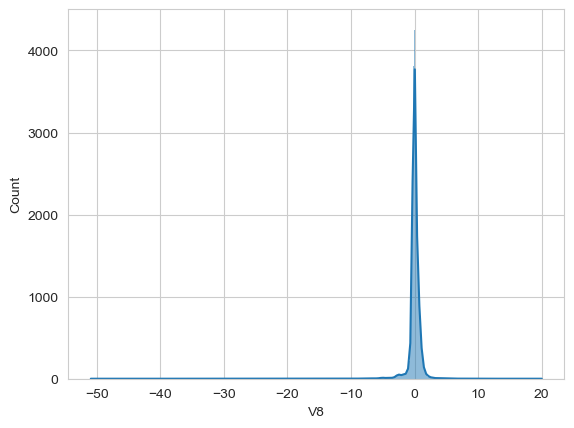

 Min: -13.3201546920984 Max: 15.5949946071278 
 mean: -0.0017437721270727566 std: 1.096510358840591 
 median: -0.0526305635500757 
 mode: 0.608605870267216


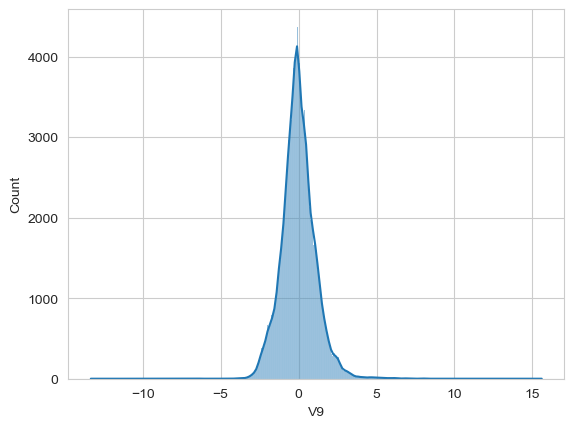

 Min: -24.5882624372475 Max: 23.7451361206545 
 mean: 3.6796223945122854e-05 std: 1.077990065276247 
 median: -0.09356866345422976 
 mode: -0.0751861699398929


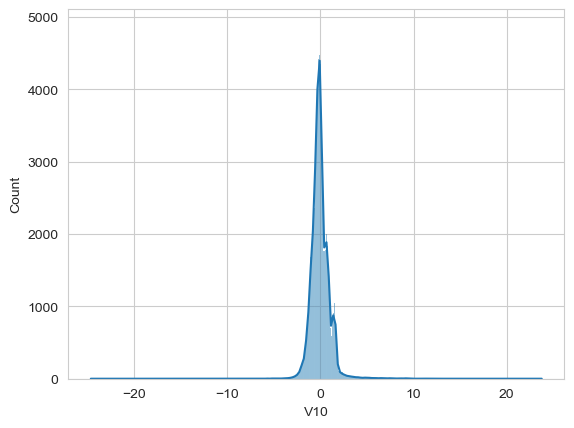

 Min: -4.79747346479757 Max: 11.6692047358121 
 mean: -8.728845921791257e-05 std: 1.0179321404236554 
 median: -0.03241462629534565 
 mode: 0.0635044576008839


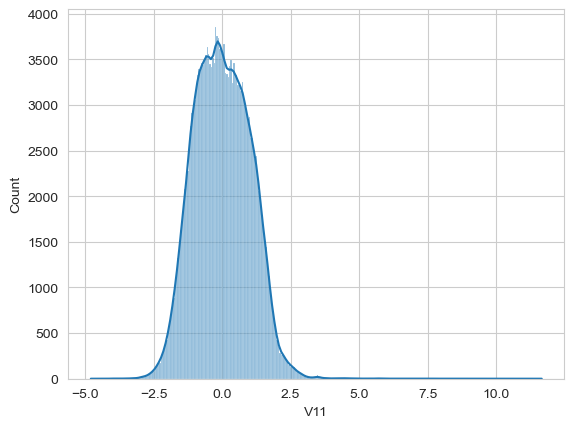

 Min: -17.2286622386187 Max: 4.84645240859009 
 mean: -0.0006740173753672886 std: 0.9921512719668788 
 median: 0.1372835514447575 
 mode: 0.350563573253678


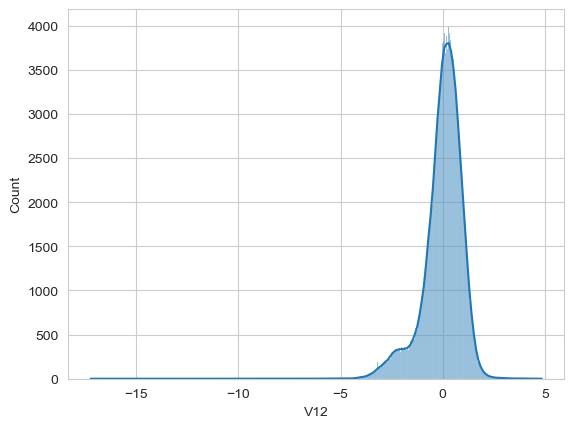

 Min: -4.00863979207158 Max: 4.56900895856606 
 mean: 0.00013908099771530548 std: 0.9947980769162375 
 median: -0.0125871096466331 
 mode: -0.141238322200309


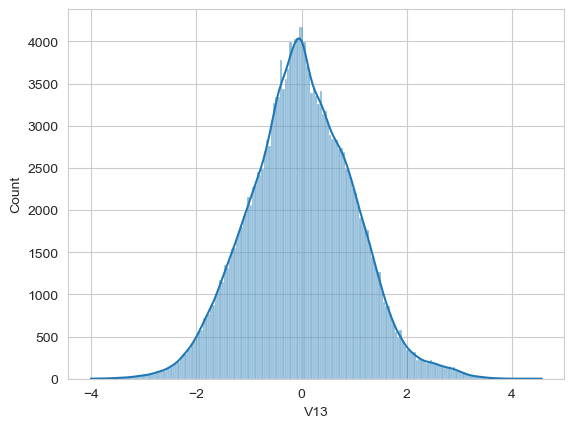

 Min: -18.4937733551053 Max: 7.75459874805484 
 mean: -0.0012148232749752321 std: 0.953465925871257 
 median: 0.0490698771939263 
 mode: 0.690971618395625


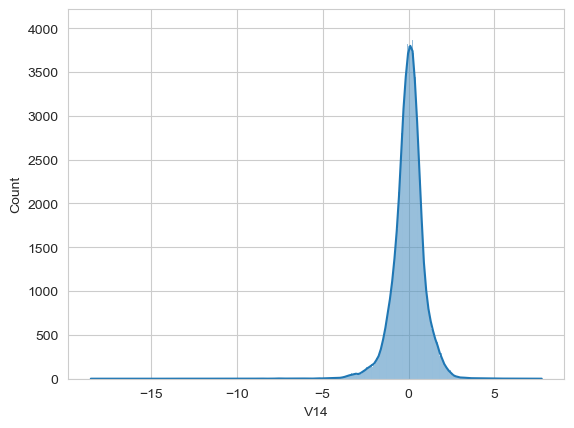

 Min: -4.49894467676621 Max: 5.78451388962946 
 mean: 0.0007487053392940551 std: 0.9153506628713566 
 median: 0.04874832632753435 
 mode: 1.2752570390935


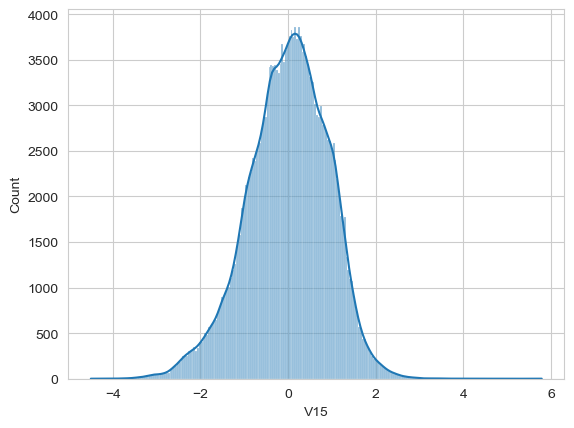

 Min: -14.1298545174931 Max: 8.28988955954619 
 mean: -0.0005393656703038932 std: 0.8719510890280001 
 median: 0.06545625811844119 
 mode: -0.371962125028419


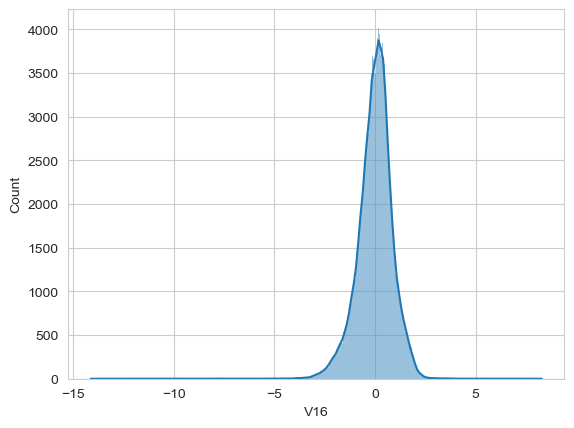

 Min: -25.1627993693248 Max: 9.25352625047285 
 mean: 0.0021713323956864396 std: 0.8393040343671101 
 median: -0.06353881862614835 
 mode: -0.601956802828445


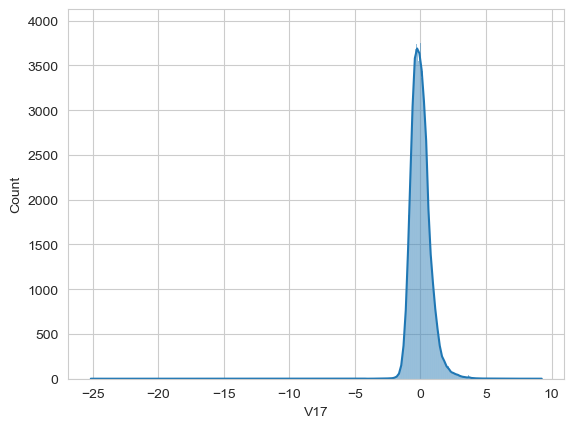

 Min: -9.49874592104677 Max: 5.04106918541184 
 mean: 0.0018490054915530785 std: 0.8378266912302007 
 median: -0.00164441915879105 
 mode: -0.0526401462570187


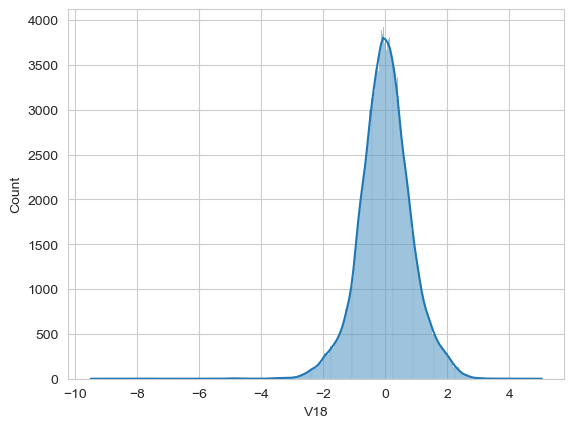

 Min: -7.21352743017759 Max: 5.57211332687969 
 mean: -0.00034122508354664694 std: 0.8127691238232784 
 median: 0.00287218219217335 
 mode: -0.330590448442944


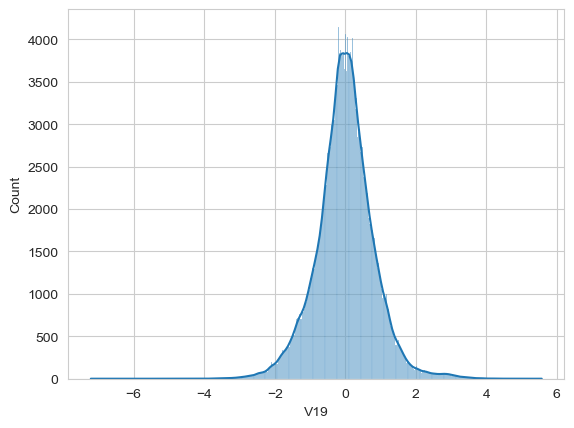

 Min: -28.009635333749 Max: 39.4209042482199 
 mean: 0.0009486223247071425 std: 0.7699865519512679 
 median: -0.062265844205246904 
 mode: -0.180370118559693


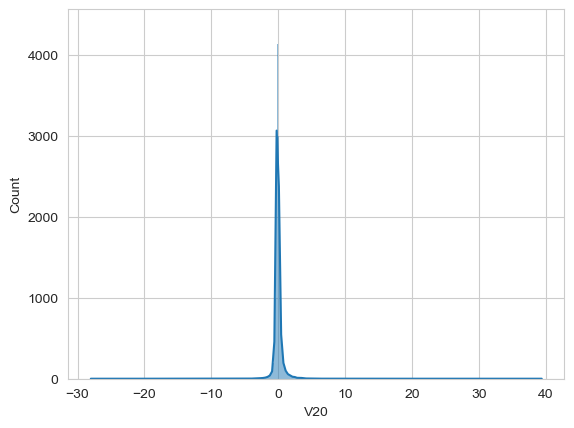

 Min: -22.889347040939 Max: 22.6148893676169 
 mean: 0.001964605832074592 std: 0.7301534953395418 
 median: -0.02909284329853955 
 mode: 0.269764951361357


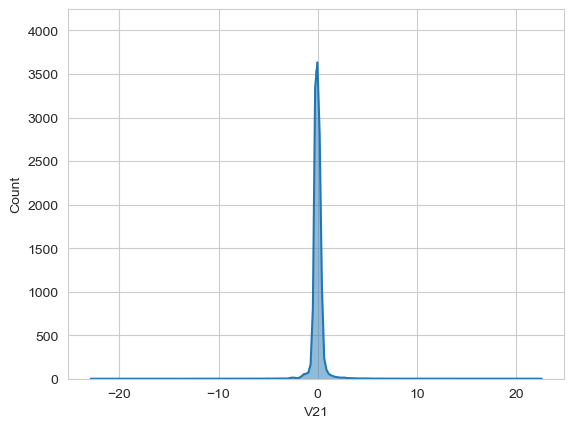

 Min: -10.933143697655 Max: 8.31627543891357 
 mean: 0.0013332501758800185 std: 0.7246260149517186 
 median: 0.0094847473640467 
 mode: 0.844626646775712


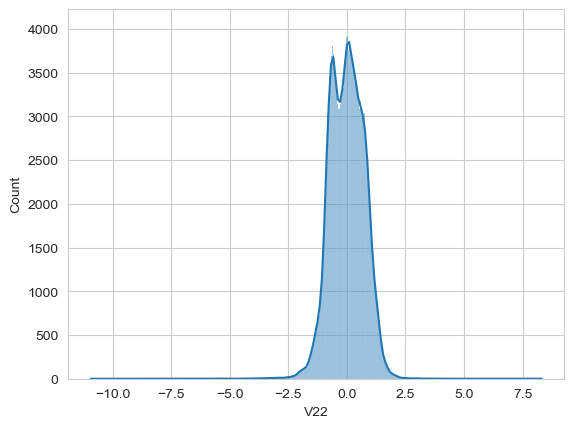

 Min: -36.666000066027 Max: 22.5284116897749 
 mean: 0.0002999677444401212 std: 0.6206583654490866 
 median: -0.0114445240786957 
 mode: 0.0206746676928111


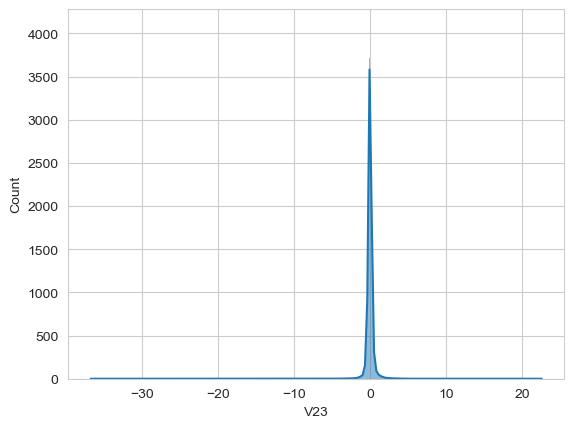

 Min: -2.83662691870341 Max: 4.01634181669268 
 mean: 0.001292812547869386 std: 0.6054210353489193 
 median: 0.0419738530377622 
 mode: 0.726211883811499


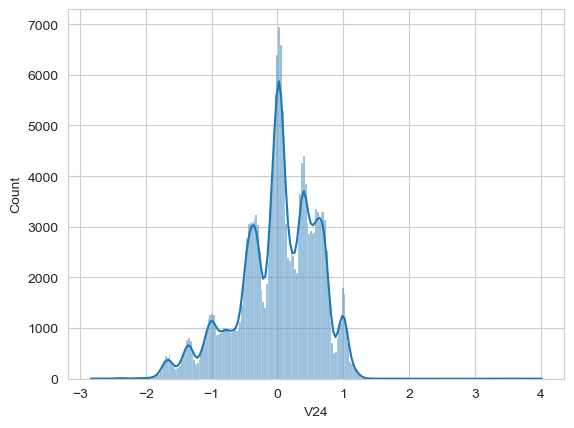

 Min: -8.69662677026752 Max: 7.51958867870916 
 mean: 0.0001101477022224808 std: 0.5215940634487176 
 median: 0.01736489678162565 
 mode: 0.366624307004913


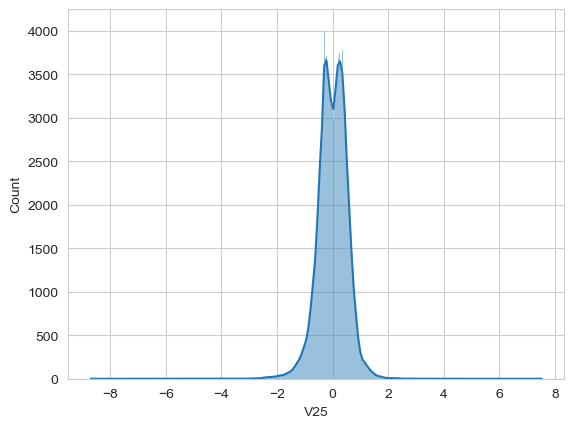

 Min: -2.60455055280817 Max: 3.5173456116238 
 mean: -0.00039465390719968627 std: 0.48118544044724143 
 median: -0.0531311146135836 
 mode: -0.398827514959463


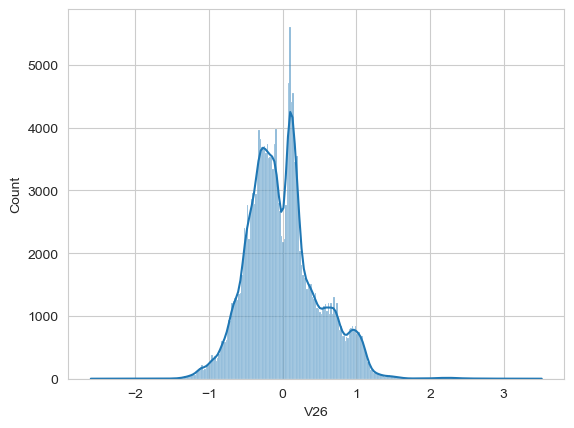

 Min: -22.5656793207827 Max: 11.1357398445742 
 mean: 0.0015245397971260335 std: 0.39393037915670226 
 median: 0.00149685758520825 
 mode: 0.0277351215052822


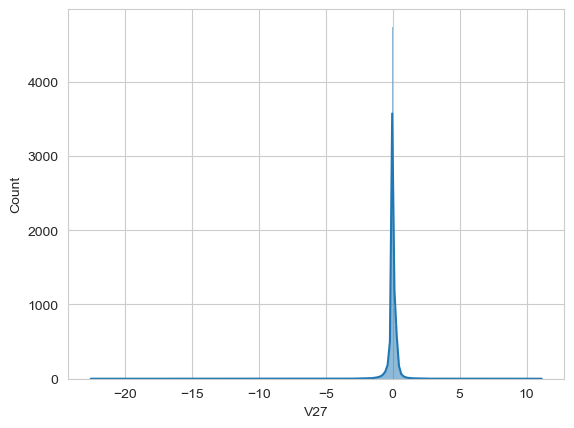

 Min: -11.7108956394515 Max: 33.8478078188831 
 mean: 0.0010347402740957148 std: 0.3322714120098506 
 median: 0.011420598899003799 
 mode: -0.0602821510762213


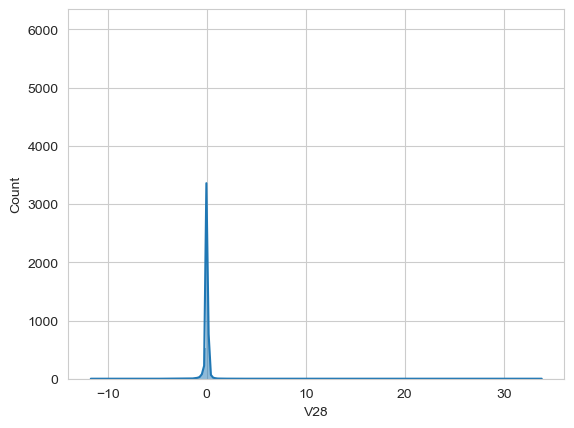

 Min: 0.009950330853168083 Max: 8.001587846046602 
 mean: 3.1758805435635122 std: 1.6374793269258376 
 median: 3.1570004211501135 
 mode: 0.6931471805599453


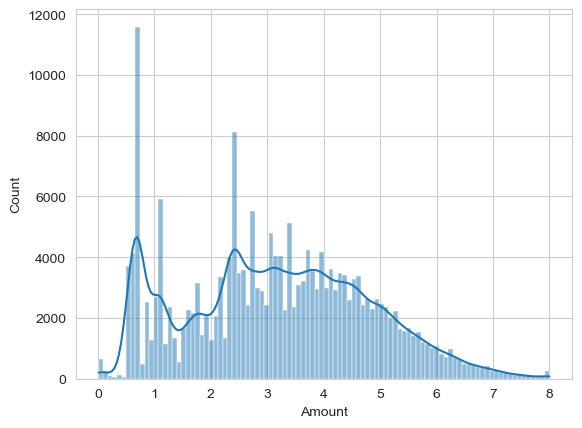

In [56]:
columns = X_train.columns
for col in columns:
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=X_train[col],kde=True) # right skewed with alot outliers
    plt.show()

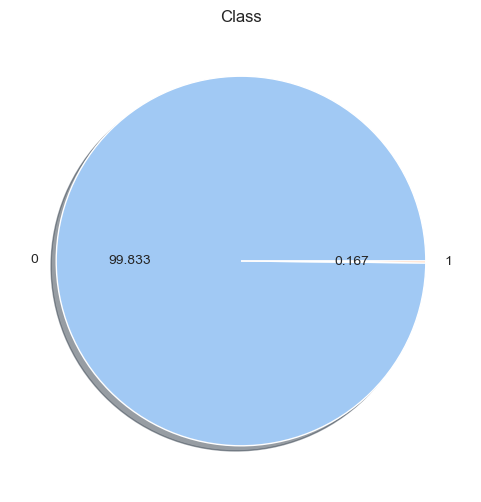

In [57]:
categorical_feat = ['Class']
colors = sns.color_palette('pastel')[0:5]
for col in categorical_feat:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.pie(df[col].value_counts(),colors=colors,
            labels=y_train[col].unique(),shadow=True,
            autopct='%.3f')
    plt.show()

DEALING WITH IMBALANCE

In [58]:

#undersampling
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

In [59]:
y_train.value_counts()

Class
0        203941
1           341
dtype: int64

In [60]:
target.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [61]:
from imblearn.datasets import make_imbalance # 0:(400 or <= 423) of y_train
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 300, 1:300}, random_state=5)
X_train_1.shape, y_train_1.shape # 800 records

((600, 30), (600, 1))

In [62]:
y_train_1.value_counts()

Class
0        300
1        300
dtype: int64

In [63]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_2, y_train_2 = ros.fit_resample(X_train, y_train)


In [64]:
X_train_2.shape, y_train_2.shape

((407882, 30), (407882, 1))

In [65]:
y_train_2.value_counts()

Class
0        203941
1        203941
dtype: int64

In [66]:
X_train_2.duplicated().sum() 

203600

In [67]:
#SMOTE
smote = SMOTE(random_state = 14)

X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

In [68]:
X_train_3.shape, y_train_3.shape

((407882, 30), (407882, 1))

In [69]:
y_train_3.value_counts()

Class
0        203941
1        203941
dtype: int64

In [70]:
X_train_3.sample(10)

Time        V1        V2        V3        V4        V5  \
17899   157417.000000  2.038687 -0.071701 -1.468237  1.054372  0.658919   
196899    6117.000000 -0.908489  1.235981  0.826220  0.084102 -0.015578   
145940  118759.000000  1.902014 -1.353330 -0.257352 -0.922049 -0.494729   
78484   139080.000000 -1.965317  2.132571 -0.943652 -0.611698  0.716962   
304457   94469.808077 -5.336327  3.642721 -9.238330  5.893298 -4.153100   
148605  154415.000000  0.091039 -0.101418  0.328395  0.347264 -0.034880   
336634   91517.039305  1.338681  1.862647 -3.787649  1.977569  2.481345   
347625   48353.527314  0.702858  0.744228 -0.092469  1.323995  0.614000   
40681    73957.000000 -0.893444  0.346708  1.889686 -0.174824  0.340038   
190987  135117.000000 -0.487998  1.420118 -0.154011 -0.920274  1.318960   

              V6        V7        V8        V9  ...       V20       V21  \
17899   0.347260 -0.002837 -0.022811  0.526842  ... -0.206482  0.072413   
196899 -0.045025 -0.040940  0.651430  0.854034  ... -0.185280 -0.319209   
145940  2.131691 -1.799180  0.711206  0.012160  ... -0.500343 -0.015379   
78484  -0.754384 -0.409934 -3.674634 -0.239649  ...  0.307543 -0.219608   
304457 -2.040826 -6.815870  0.690884 -2.050732  ...  0.754692  0.019423   
148605  0.124143  0.373088 -0.052965 -1.215088  ... -0.200704 -0.058954   
336634 -1.644690  1.115931 -0.394497  1.117274  ... -0.159688 -0.502757   
347625 -0.333615  0.253938  0.028218 -0.228225  ... -0.196115 -0.059802   
40681  -0.837689  0.779257 -0.240262  0.276465  ... -0.173180 -0.210676   
190987 -0.642014  1.801410 -1.093106  1.327839  ...  0.832753  0.049355   

             V22       V23       V24       V25       V26       V27       V28  \
17899   0.498103 -0.175714 -1.362246  0.487578 -0.397709  0.017997 -0.072889   
196899 -0.888039  0.076756 -0.476602 -0.294128  0.062402 -0.038423  0.001821   
145940  0.490667  0.334623 -0.938892 -0.858288  0.677817  0.056095 -0.043067   
78484   1.223343 -0.010485 -0.160442 -0.115975 -0.260453 -0.342452  0.038697   
304457  0.032350 -0.531563 -0.049979 -0.778385 -0.384818 -0.280100  0.192425   
148605  0.266763  0.461562  0.614083 -1.337972 -0.734817  0.339013  0.320692   
336634 -0.951678 -0.160863 -0.020177  0.434218 -0.622516 -0.124083 -0.058680   
347625 -0.150812 -0.156742 -0.625860  0.394413 -0.240565  0.043020  0.069999   
40681  -0.365080  0.019928  0.379523  0.062413  0.098500 -0.235639 -0.133451   
190987  1.304211 -0.225371  0.611427 -0.638633 -0.353562  0.139043 -0.327284   

          Amount  
17899   2.396986  
196899  2.827314  
145940  3.848018  
78484   1.211941  
304457  5.525294  
148605  4.677026  
336634  0.693147  
347625  1.062827  
40681   0.693147  
190987  1.026042  

[10 rows x 30 columns]

In [71]:
X_train_3.duplicated().sum()

0

<Axes: >

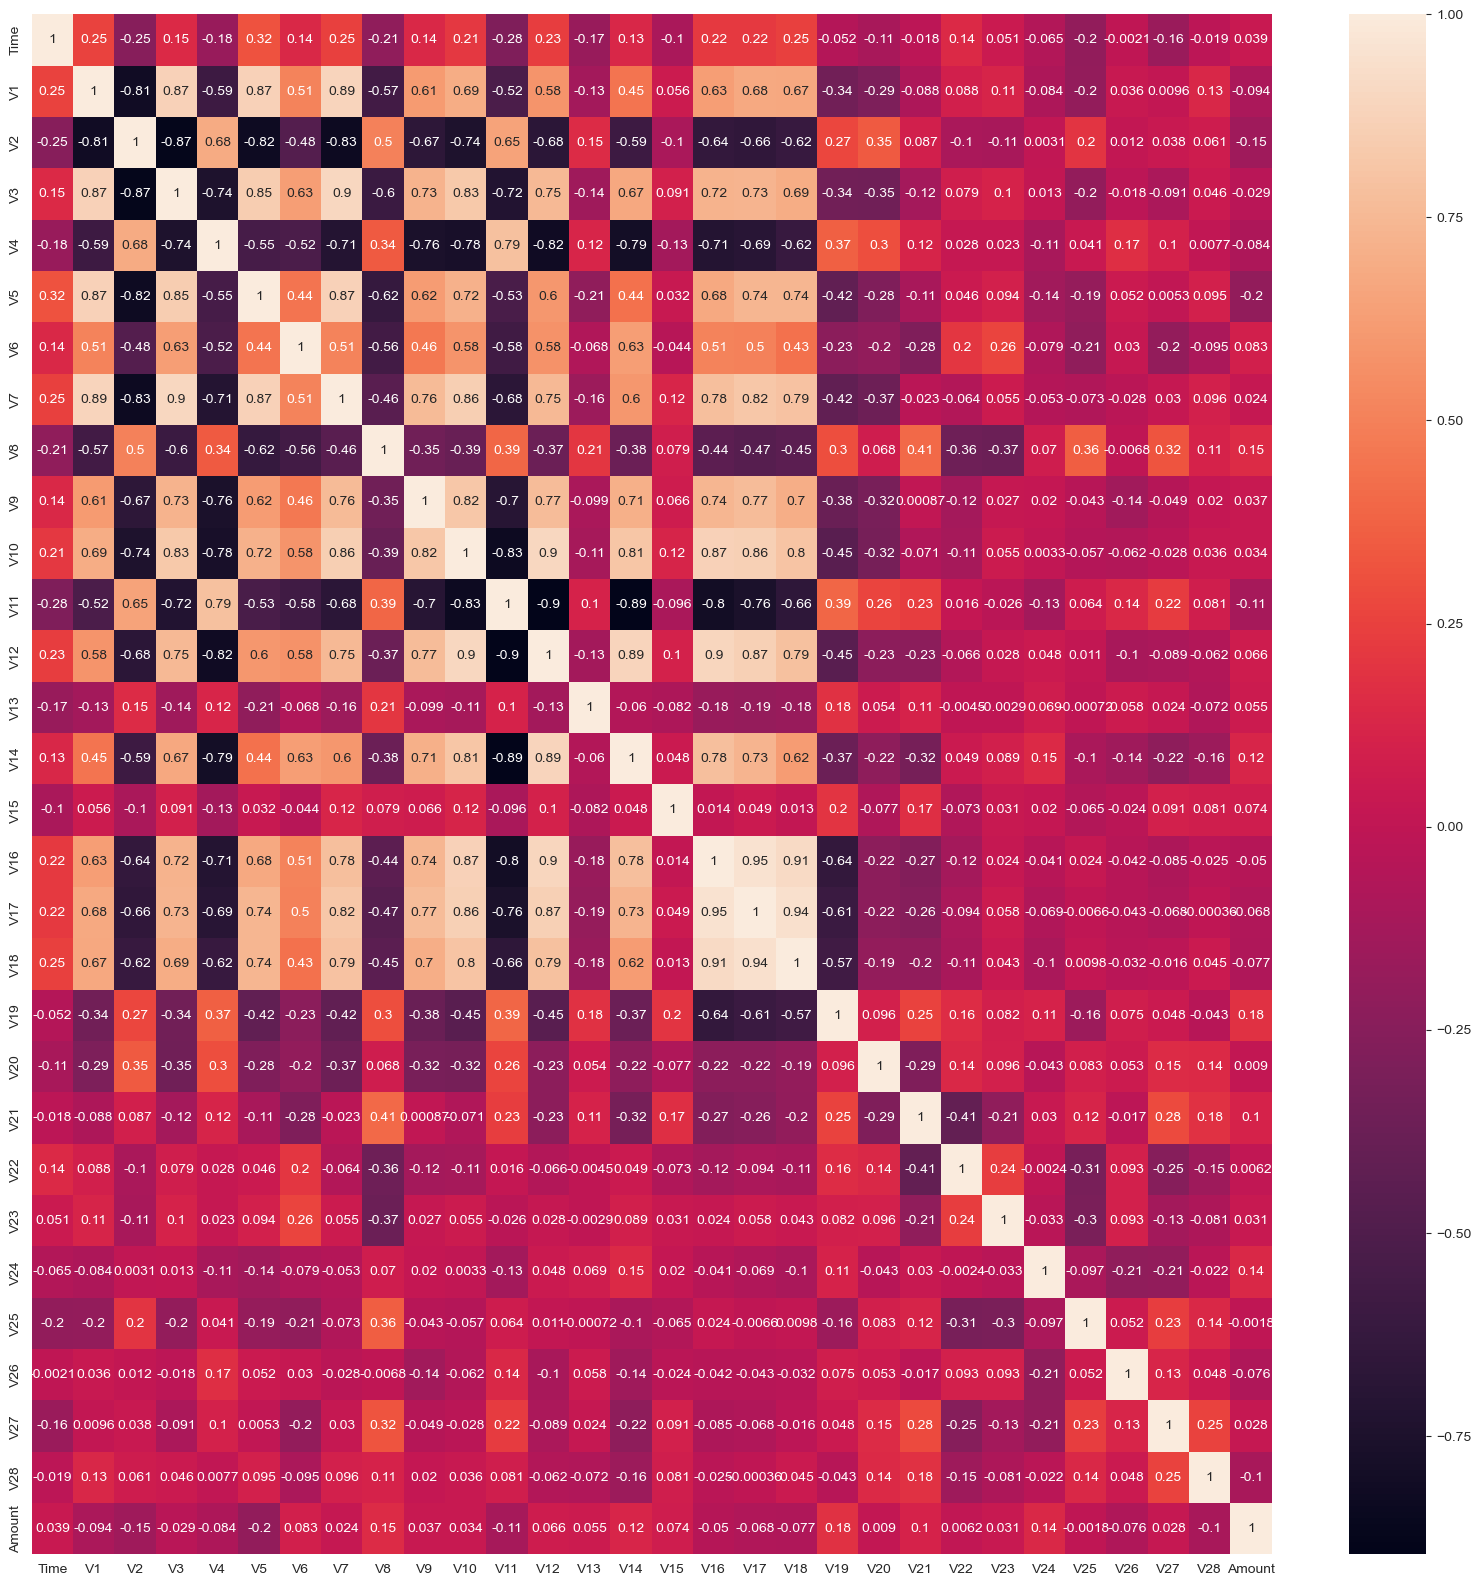

In [73]:
##Bivariate Analysis
X_train=X_train_1
y_train=y_train_1
plt.figure(figsize=(20, 20))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True)

In [74]:
corr_mat

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

In [75]:
for col in corr_matrix.columns:
    corr_matrix[col] = corr_matrix[col].map(lambda p: abs(p) > 0.9)
np.sum(np.sum(corr_matrix))

38

In [76]:
dicto = {}
for col in corr_matrix.columns:
    dicto[str(col)] = corr_matrix.iloc[list(corr_matrix[col]), :].index
dicto

{'Time': Index(['Time'], dtype='object'),
 'V1': Index(['V1'], dtype='object'),
 'V2': Index(['V2'], dtype='object'),
 'V3': Index(['V3', 'V7'], dtype='object'),
 'V4': Index(['V4'], dtype='object'),
 'V5': Index(['V5'], dtype='object'),
 'V6': Index(['V6'], dtype='object'),
 'V7': Index(['V3', 'V7'], dtype='object'),
 'V8': Index(['V8'], dtype='object'),
 'V9': Index(['V9'], dtype='object'),
 'V10': Index(['V10'], dtype='object'),
 'V11': Index(['V11'], dtype='object'),
 'V12': Index(['V12'], dtype='object'),
 'V13': Index(['V13'], dtype='object'),
 'V14': Index(['V14'], dtype='object'),
 'V15': Index(['V15'], dtype='object'),
 'V16': Index(['V16', 'V17', 'V18'], dtype='object'),
 'V17': Index(['V16', 'V17', 'V18'], dtype='object'),
 'V18': Index(['V16', 'V17', 'V18'], dtype='object'),
 'V19': Index(['V19'], dtype='object'),
 'V20': Index(['V20'], dtype='object'),
 'V21': Index(['V21'], dtype='object'),
 'V22': Index(['V22'], dtype='object'),
 'V23': Index(['V23'], dtype='object'),
 '

In [ ]:
# multivariate
#plt.figure(figsize=(40, 40))
#sns.pairplot(X_train.sample(10, random_state=2))

SCALING DATA

In [83]:
std_scale = StandardScaler()


columns = X_train.columns

X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
X_train

Time        V1        V2        V3        V4        V5        V6  \
0   -0.212268  0.433428 -0.579450  0.585663 -1.484143  0.214277 -0.491282   
1    1.511548  0.296134 -0.296777  0.507030 -0.875934  0.407897 -0.298319   
2    1.025990  0.262338 -0.254510  1.131642  0.722154  0.251571  2.208622   
3   -0.174374 -0.332168  0.780886  0.357944 -0.784079  0.318763 -0.449698   
4   -0.847565  0.216772 -0.604007  0.785620 -1.405359  0.413446 -0.443970   
..        ...       ...       ...       ...       ...       ...       ...   
595 -0.886318 -1.147366  1.307899 -1.077879  1.906138 -1.600711 -1.085385   
596  1.379489 -0.241954  0.444170 -0.675652  1.772692  0.256483 -0.750597   
597  1.394696  0.672536 -0.772166  0.192140 -0.480555  0.304530 -0.265540   
598 -1.212776 -2.672768  2.570250 -2.675198  1.206053 -2.744516 -2.057045   
599  0.020638  0.013540  0.432322 -0.348169  0.457773 -0.377555  0.033826   

           V7        V8        V9  ...       V20       V21       V22  \
0    0.542759 -0.287754 -0.466300  ... -0.564353 -0.244634  0.371036   
1    0.601648 -0.136823  0.569131  ... -0.461307 -0.372482 -0.728225   
2    0.424700 -0.125192  0.497118  ...  0.335603 -0.201128  1.093949   
3    0.828986 -0.443191  2.248174  ...  2.958241 -0.764675  0.746025   
4    0.594078 -0.248431 -0.000340  ... -0.057529 -0.044732  0.444644   
..        ...       ...       ...  ...       ...       ...       ...   
595 -1.790547  1.281885 -2.667873  ...  0.459734  1.471788  0.765679   
596 -0.115203 -0.294255 -0.135168  ... -0.404512  0.156377  0.797213   
597  0.590275 -0.300202  1.076173  ...  0.484741 -0.127321 -0.190227   
598 -2.276671  2.900776 -1.302954  ...  1.585723  0.982633 -1.399501   
599 -0.230204  0.303809 -0.817423  ...  0.743208  0.421427 -0.003283   

          V23       V24       V25       V26       V27       V28    Amount  
0    0.150365  0.750093 -1.271063 -0.934188  0.393663  0.596172 -0.171617  
1    0.647324  0.037338 -0.776904  0.276517 -0.109020 -0.085887 -0.379571  
2   -0.526128  1.599962  0.097162  1.096080 -0.422298 -0.820851  0.446013  
3    0.071425  1.328637 -0.182439 -1.578111 -0.765688 -4.809682 -1.354230  
4   -0.464941  0.817589  1.418801 -0.692160 -0.199799  0.023592  0.362704  
..        ...       ...       ...       ...       ...       ...       ...  
595  0.069067  0.999396  0.644969  1.001668  1.275457  0.391746  0.779910  
596  0.637036 -0.995281 -0.770822  0.737487 -3.266833  0.935523 -1.322910  
597 -0.293096 -0.348333 -0.235103 -1.348423 -0.132999  0.085944  1.550578  
598 -1.039133  0.299896  1.576931 -0.534051  1.879739  1.152263  0.848454  
599  0.079271 -1.307006  0.192271 -0.325381  1.147853  0.818090  1.331776  

[600 rows x 30 columns]

In [84]:
X_train.describe()

Time            V1            V2            V3            V4  \
count  600.000000  6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02   
mean     0.000000 -6.868580e-16 -3.789561e-16 -5.210647e-16  9.473903e-17   
std      1.000834  1.000834e+00  1.000834e+00  1.000834e+00  1.000834e+00   
min     -1.718834 -5.277444e+00 -2.990991e+00 -4.501002e+00 -1.859192e+00   
25%     -0.864637 -4.602409e-02 -5.433298e-01 -2.710869e-01 -7.620430e-01   
50%     -0.175334  2.686844e-01 -2.362590e-01  3.213811e-01 -2.865061e-01   
75%      0.981335  5.957512e-01  2.957166e-01  6.281913e-01  6.162318e-01   
max      1.795266  8.647289e-01  4.382018e+00  1.168931e+00  3.081945e+00   

               V5          V6            V7            V8            V9  ...  \
count  600.000000  600.000000  6.000000e+02  6.000000e+02  6.000000e+02  ...   
mean     0.000000    0.000000 -4.736952e-17 -2.368476e-17 -7.579123e-16  ...   
std      1.000834    1.000834  1.000834e+00  1.000834e+00  1.000834e+00  ...   
min     -4.902368   -3.434339 -6.030922e+00 -6.558498e+00 -4.421275e+00  ...   
25%     -0.035937   -0.502985 -9.323828e-02 -2.579966e-01 -4.680021e-01  ...   
50%      0.270530    0.089594  3.613526e-01 -1.517695e-01  2.367455e-01  ...   
75%      0.466473    0.499313  5.547235e-01  4.306352e-02  6.787638e-01  ...   
max      2.699402    3.148108  1.634843e+00  5.360703e+00  2.739250e+00  ...   

                V20           V21           V22           V23           V24  \
count  6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02   
mean  -6.631732e-16  1.823726e-15 -3.641532e-16 -5.921189e-18 -6.987004e-16   
std    1.000834e+00  1.000834e+00  1.000834e+00  1.000834e+00  1.000834e+00   
min   -5.537378e+00 -9.015698e+00 -3.552536e+00 -9.439361e+00 -4.087316e+00   
25%   -4.253594e-01 -3.211048e-01 -6.600208e-01 -3.486433e-01 -5.941830e-01   
50%   -1.765977e-01 -1.118547e-01  2.709248e-02 -3.639868e-02  1.301714e-01   
75%    3.012204e-01  2.409283e-01  6.349653e-01  3.023509e-01  7.422095e-01   
max    6.536607e+00  8.068438e+00  6.731280e+00  5.323219e+00  2.201636e+00   

                V25           V26           V27           V28        Amount  
count  6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02  
mean  -3.552714e-16  1.480297e-17 -1.207923e-15  2.368476e-17  1.924387e-16  
std    1.000834e+00  1.000834e+00  1.000834e+00  1.000834e+00  1.000834e+00  
min   -3.316742e+00 -2.502644e+00 -8.711279e+00 -4.809682e+00 -1.701165e+00  
25%   -5.328147e-01 -6.693320e-01 -2.093366e-01 -2.410546e-01 -9.853100e-01  
50%    2.205696e-02 -1.050759e-01 -6.997328e-02  3.178373e-03  4.121419e-02  
75%    5.243229e-01  5.981249e-01  4.008962e-01  3.945181e-01  8.484543e-01  
max    3.351841e+00  4.840896e+00  2.640994e+00  4.231793e+00  2.281018e+00  

[8 rows x 30 columns]

In [199]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
minmax_scale = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = minmax_scale.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = minmax_scale.transform(X_test)

# Convert the scaled data back to dataframes
X_train= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the scaled training data
X_train.describe()


Time          V1          V2          V3          V4          V5  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     0.489125    0.859215    0.405668    0.793837    0.376268    0.644898   
std      0.284805    0.162945    0.135743    0.176516    0.202551    0.131658   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.243077    0.851721    0.331976    0.746026    0.222044    0.640171   
50%      0.439230    0.902959    0.373624    0.850519    0.318284    0.680486   
75%      0.768381    0.956208    0.445776    0.904630    0.500983    0.706262   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               V6          V7          V8          V9  ...         V20  \
count  600.000000  600.000000  600.000000  600.000000  ...  600.000000   
mean     0.521742    0.786735    0.550246    0.617451  ...    0.458621   
std      0.152046    0.130559    0.083968    0.139771  ...    0.082892   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.445329    0.774572    0.528601    0.552093  ...    0.423391   
50%      0.535353    0.833873    0.537513    0.650514  ...    0.443994   
75%      0.597597    0.859098    0.553859    0.712244  ...    0.483568   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              V21         V22         V23         V24         V25         V26  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     0.527723    0.345449    0.639411    0.649920    0.497368    0.340795   
std      0.058583    0.097321    0.067795    0.159142    0.150082    0.136288   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.508928    0.281269    0.615795    0.555440    0.417469    0.249650   
50%      0.521176    0.348084    0.636946    0.670618    0.500676    0.326487   
75%      0.541826    0.407193    0.659892    0.767938    0.575994    0.422244   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              V27         V28      Amount  
count  600.000000  600.000000  600.000000  
mean     0.767360    0.531958    0.427194  
std      0.088162    0.110694    0.251328  
min      0.000000    0.000000    0.000000  
25%      0.748920    0.505297    0.179764  
50%      0.761196    0.532309    0.437544  
75%      0.802674    0.575592    0.640257  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [200]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [201]:
mi_scores = make_mi_scores(X_train, y_train['Class'], discrete_features=False)
mi_scores

V14       0.471442
V17       0.454205
V10       0.409317
V12       0.404271
V11       0.373287
V4        0.356679
V3        0.349428
V16       0.338555
V7        0.280082
V2        0.254817
V27       0.227621
V21       0.221146
V18       0.214079
V1        0.200872
V9        0.200757
V6        0.198477
Amount    0.197818
V28       0.159897
V8        0.152431
V5        0.151753
V20       0.139767
V19       0.105892
Time      0.101765
V23       0.063155
V26       0.034861
V25       0.025813
V22       0.021982
V24       0.008208
V15       0.001552
V13       0.000000
Name: MI Scores, dtype: float64

In [202]:
#METRICS and Scores functions
def classification_result(y_test, y_pred, prob, plot_roc=True):
    # Calculate and print classification metrics
    acc = accuracy_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'Test Accuracy: {acc * 100:.2f}%')
    print(f'F1 score: {f1:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    
    # Print classification report as heatmap
    clf_report = classification_report(y_test, y_pred, target_names=['Transaction','Fraud'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()
    
    # Plot ROC curve if desired
    if plot_roc:
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, 'g-', label=f'AUC = {auc_value:.2f}')
        plt.grid()
        plt.legend(loc='lower right')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.title('Receiver Operating Characteristic')
        plt.show()


In [245]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def classification_result(name,y_test, y_pred, prob, plot_roc=True, plot_cm=True):
    # Calculate and print classification metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'Test Accuracy: {acc * 100:.2f}%')
    print(f'F1 score: {f1:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    
    # Plot confusion matrix
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 16})
        plt.xlabel('Predicted', fontsize=16)
        plt.ylabel('Actual', fontsize=16)
        plt.xticks([0.5, 1.5], ['Transaction', 'Fraud'], fontsize=12)
        plt.yticks([0.5, 1.5], ['Transaction', 'Fraud'], fontsize=12)
        plt.title(f'Confusion Matrix for {name} \n Predicted vs Actual', fontname='Arial', fontsize=20, pad=10)
        plt.show()
    
    # Print classification report as heatmap
    clf_report = classification_report(y_test, y_pred, target_names=['Transaction','Fraud'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()
    
    # Plot ROC curve if desired
    if plot_roc:
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, 'g-', label=f'AUC = {auc_value:.2f}')
        plt.grid()
        plt.legend(loc='lower right')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.title('Receiver Operating Characteristic')
        plt.show()


Test Accuracy: 97.84%
F1 score: 0.1205
Recall: 0.8936
Precision: 0.0646
Mean Absolute Error: 0.0216
Mean Squared Error: 0.0216


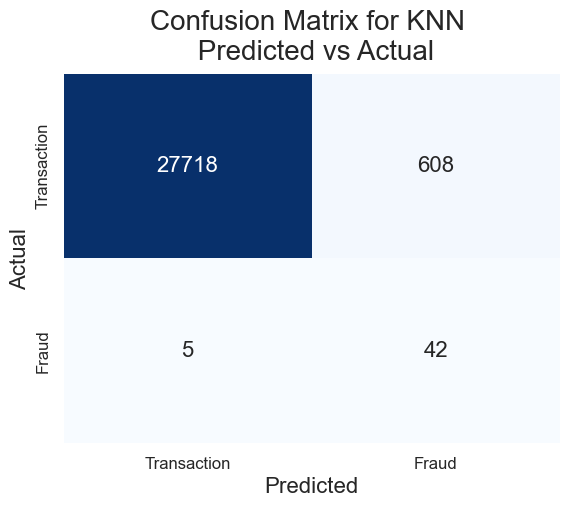

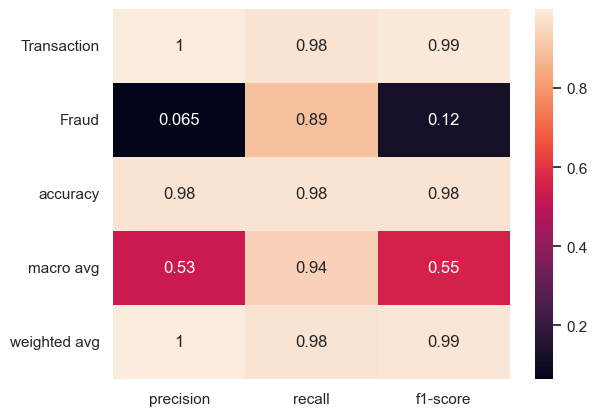

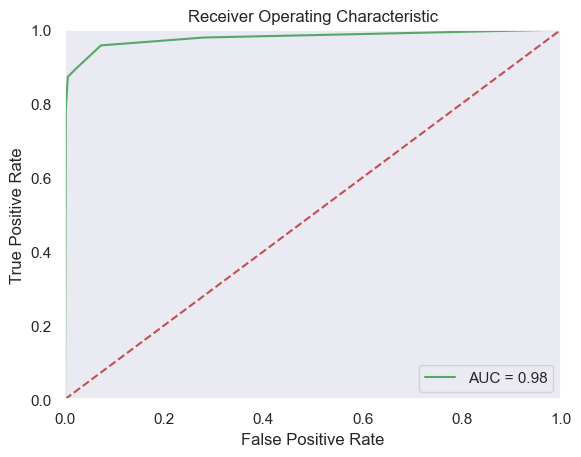

In [246]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('KNN',y_test, y_pred, prob)

Test Accuracy: 99.83%
F1 score: 0.0000
Recall: 0.0000
Precision: 0.0000
Mean Absolute Error: 0.0017
Mean Squared Error: 0.0017


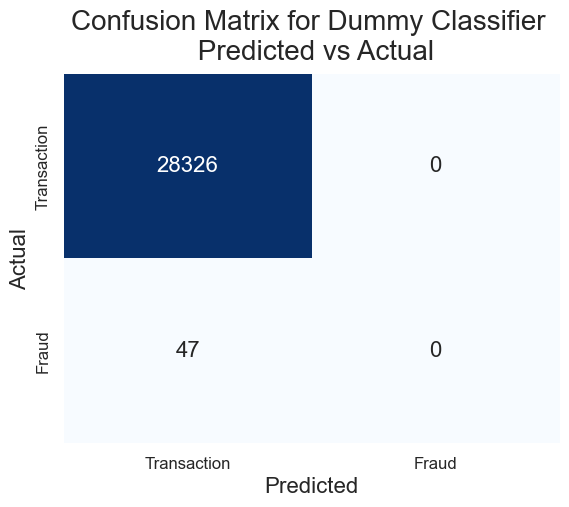

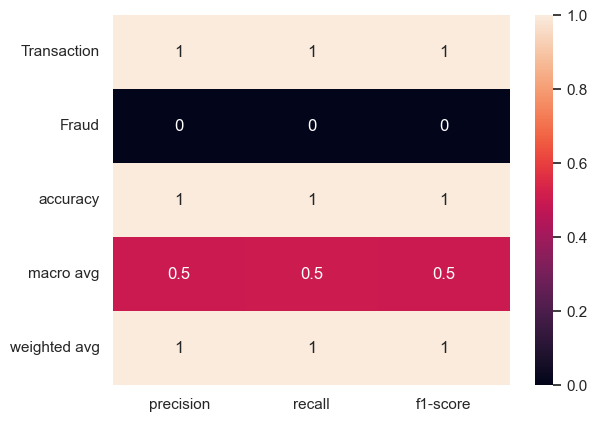

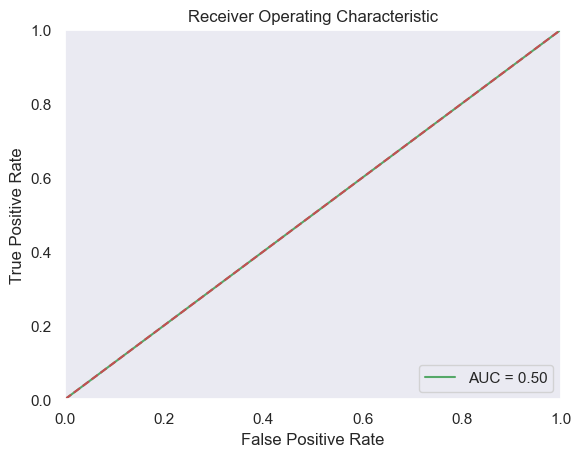

In [247]:
from sklearn.dummy import DummyClassifier

# Train a dummy classifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

# Predict on test set and calculate probabilities
y_pred_dummy = dummy.predict(X_test)
y_pred_prob_dummy = dummy.predict_proba(X_test)[:, 1]

# Evaluate the dummy classifier
classification_result('Dummy Classifier',y_test, y_pred_dummy, y_pred_prob_dummy)



Test Accuracy: 97.21%
F1 score: 0.0917
Recall: 0.8511
Precision: 0.0485
Mean Absolute Error: 0.0279
Mean Squared Error: 0.0279


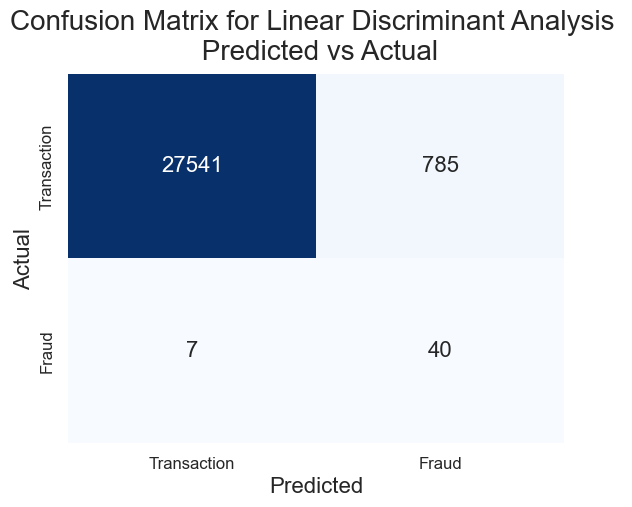

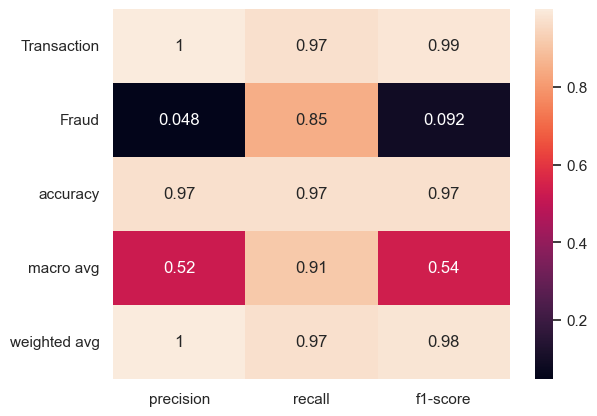

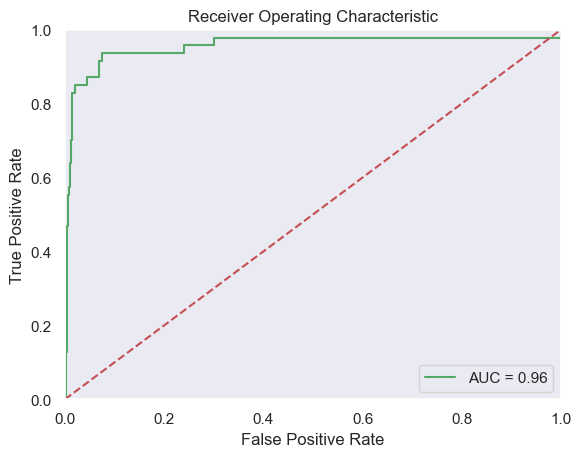

In [248]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_pred = lda_clf.predict(X_test)
lda_prob = lda_clf.predict_proba(X_test)
lda_precision, lda_recall, _ = precision_recall_curve(y_test, lda_prob[:,1])
classification_result('Linear Discriminant Analysis',y_test, lda_pred, lda_prob[:,1])

Test Accuracy: 87.97%
F1 score: 0.0246
Recall: 0.9149
Precision: 0.0125
Mean Absolute Error: 0.1203
Mean Squared Error: 0.1203


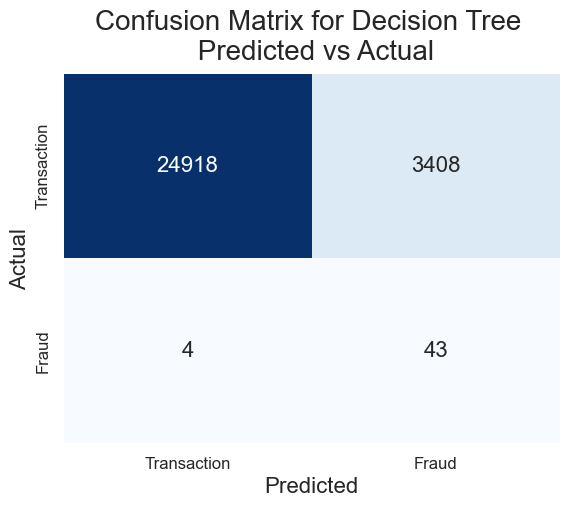

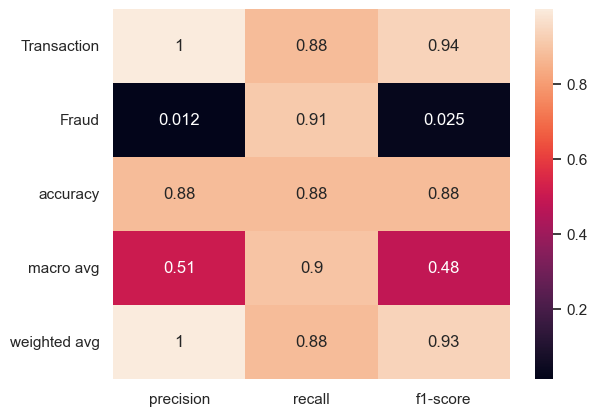

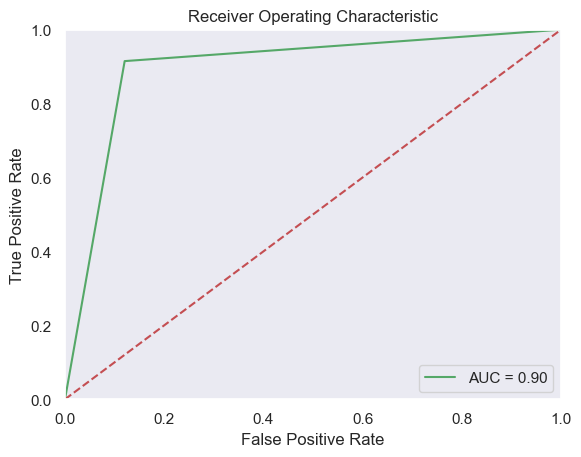

In [249]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
y_pred_prob = DT_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Decision Tree',y_test, y_pred, prob)


Test Accuracy: 96.82%
F1 score: 0.0888
Recall: 0.9362
Precision: 0.0466
Mean Absolute Error: 0.0318
Mean Squared Error: 0.0318


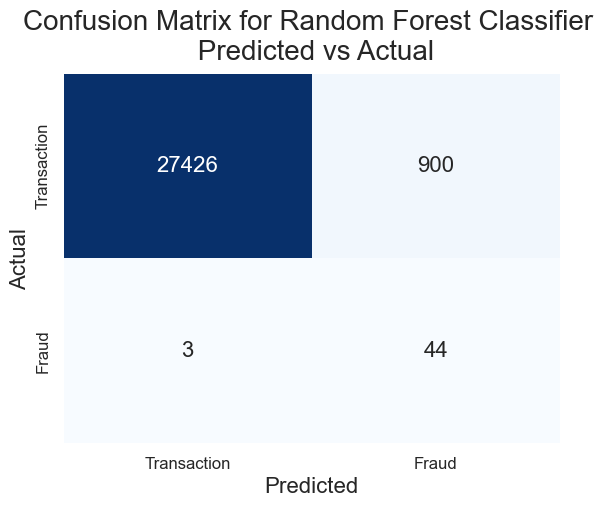

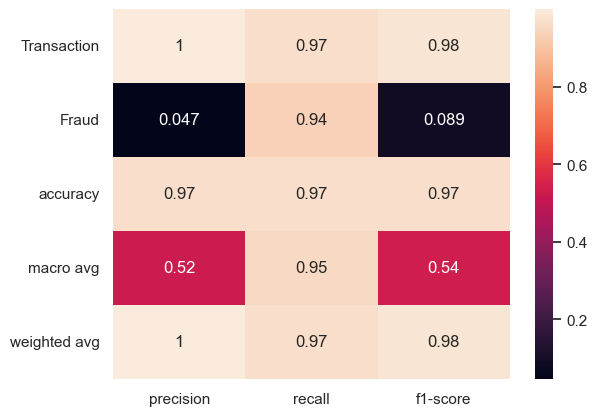

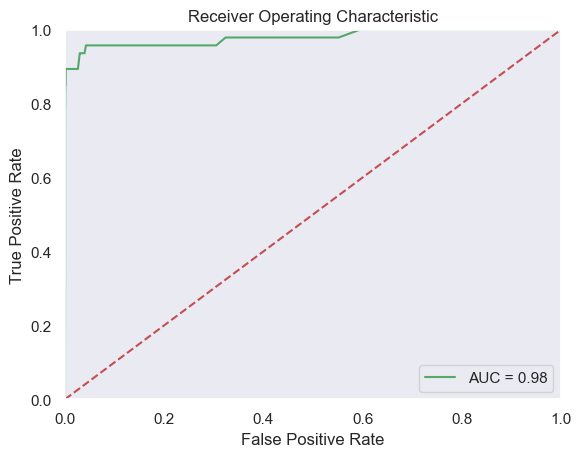

In [250]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Random Forest Classifier',y_test, y_pred, prob)


Test Accuracy: 98.78%
F1 score: 0.1986
Recall: 0.9149
Precision: 0.1114
Mean Absolute Error: 0.0122
Mean Squared Error: 0.0122


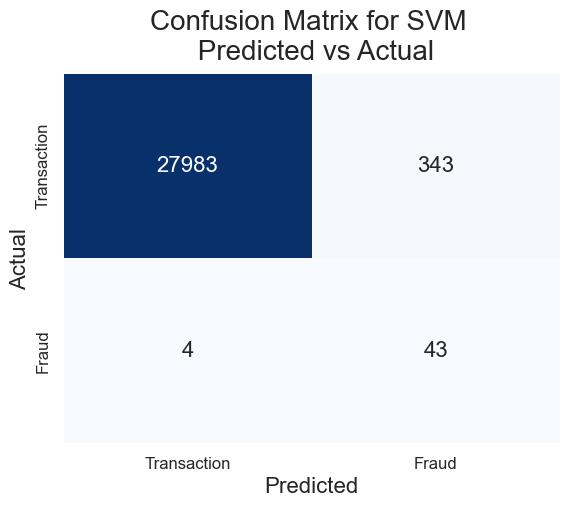

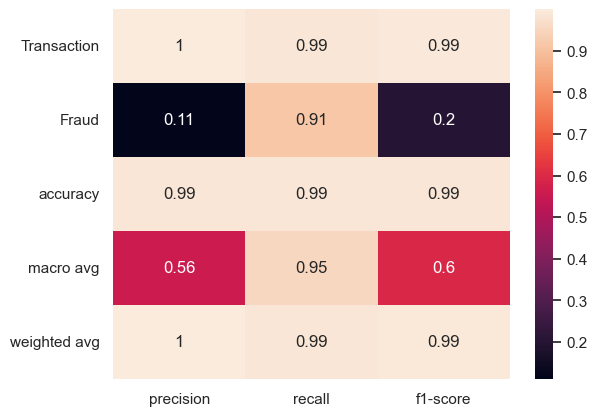

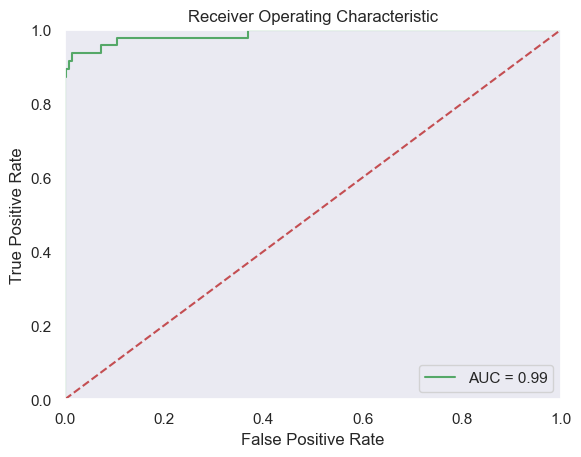

In [251]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('SVM',y_test, y_pred, prob, plot_roc=True)


Test Accuracy: 96.88%
F1 score: 0.0867
Recall: 0.8936
Precision: 0.0456
Mean Absolute Error: 0.0312
Mean Squared Error: 0.0312


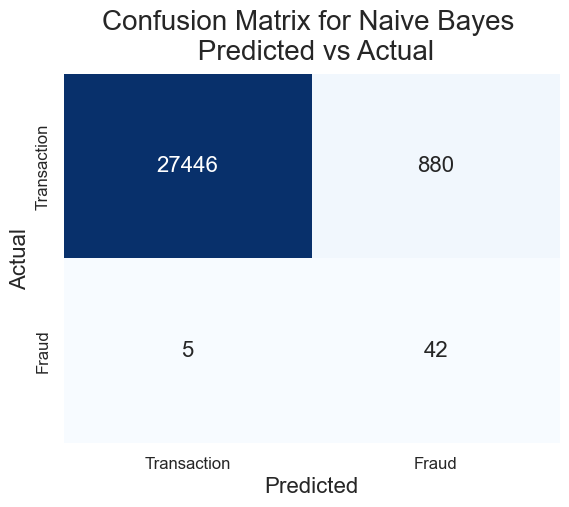

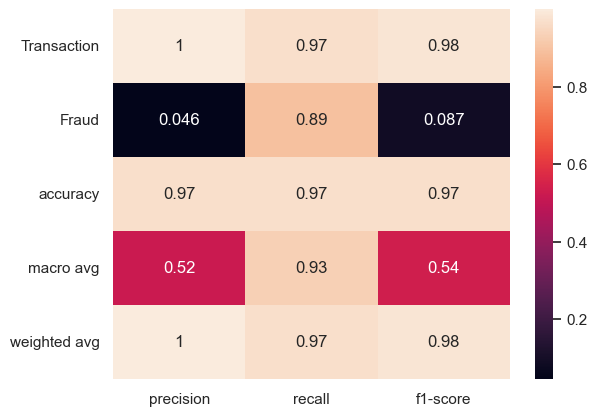

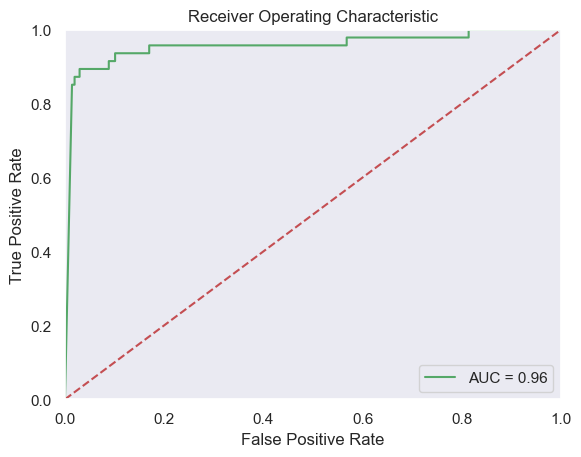

In [252]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
y_pred_prob = NB_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Naive Bayes',y_test, y_pred, prob)


Test Accuracy: 99.51%
F1 score: 0.3767
Recall: 0.8936
Precision: 0.2386
Mean Absolute Error: 0.0049
Mean Squared Error: 0.0049


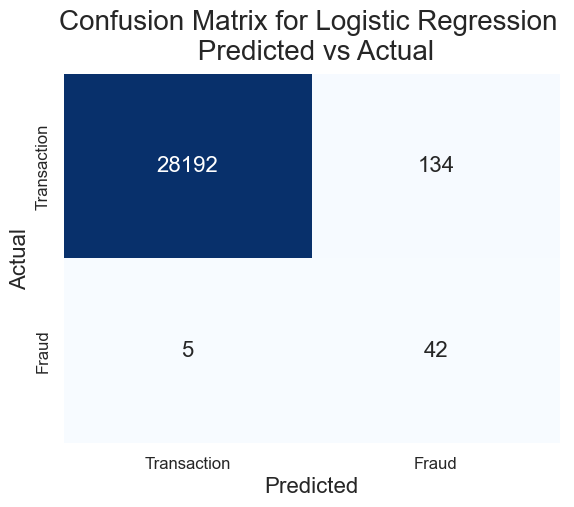

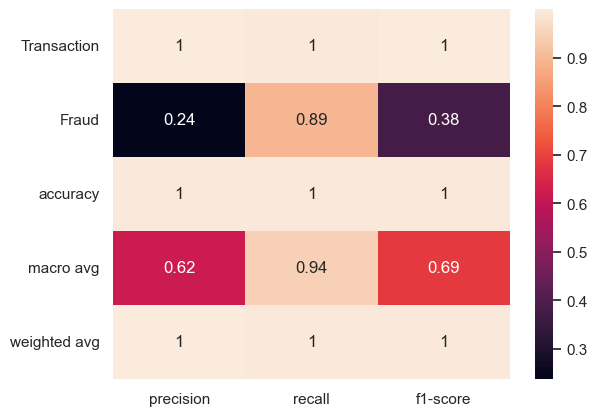

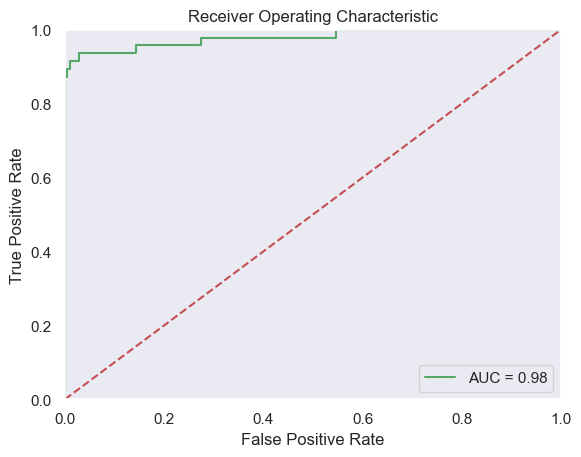

In [253]:
logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)
y_pred = logestic_model.predict(X_test)
y_pred_prob = logestic_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('Logistic Regression',y_test, y_pred, prob, plot_roc=True)


[03:15:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy: 95.76%
F1 score: 0.0682
Recall: 0.9362
Precision: 0.0354
Mean Absolute Error: 0.0424
Mean Squared Error: 0.0424


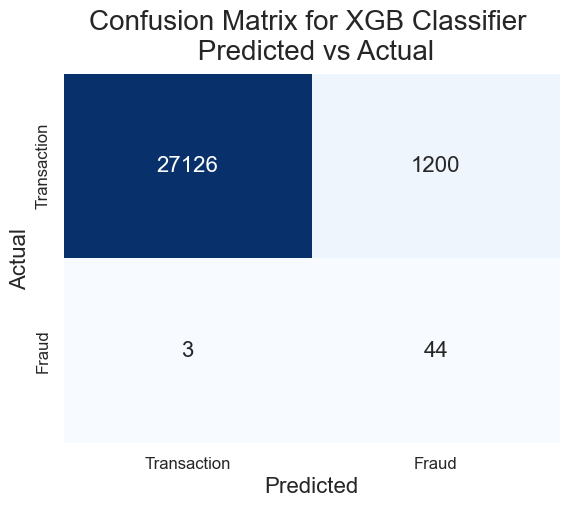

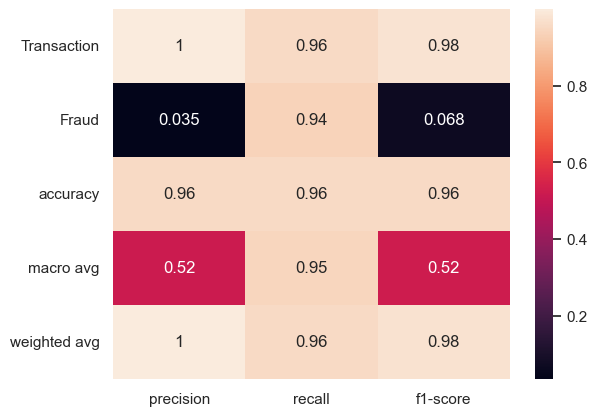

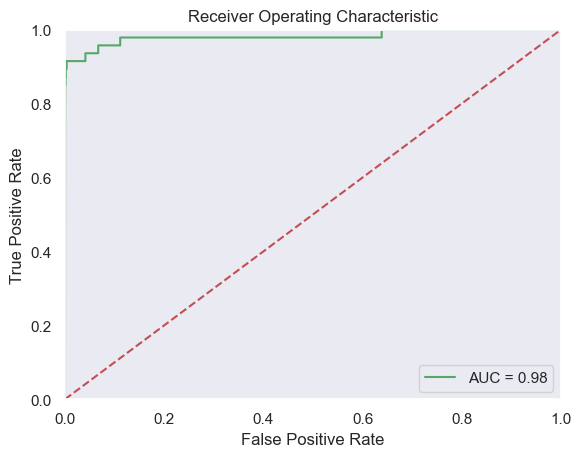

In [254]:
xgbc = XGBClassifier(random_state=5)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result('XGB Classifier',y_test, y_pred, prob)


In [255]:
models = [knn,lda_clf,DT_model,rf_model,svm_model,NB_model,logestic_model,xgbc, dummy]
model_names = ['KNN', 'Linear Discriminant Analysis', 'Decision Tree','Random Forest','SVM','Naive Bayes','Logistic Regression','XGBoost', 'Dummy']

In [256]:
from sklearn import metrics

def plot_roc_curves(X, y, models, model_names, figsize=(15,10)):
    """
    Plots ROC curves for multiple models.

    Args:
        X (numpy array): Array of feature values.
        y (numpy array): Array of target values.
        models (list): List of fitted models.
        model_names (list): List of model names.
        figsize (tuple): Figure size.

    Returns:
        None
    """
    # Create a figure with the specified size
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        # Generate predictions for the test set
        y_pred_prob = model.predict(X)
        # Calculate false positive rate (FPR), true positive rate (TPR), and threshold values
        fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_prob)
        # Plot ROC curve
        ax.plot(fpr, tpr, label=model_names[i])

    # Add legend and labels
    ax.legend()
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curves')
    plt.show()



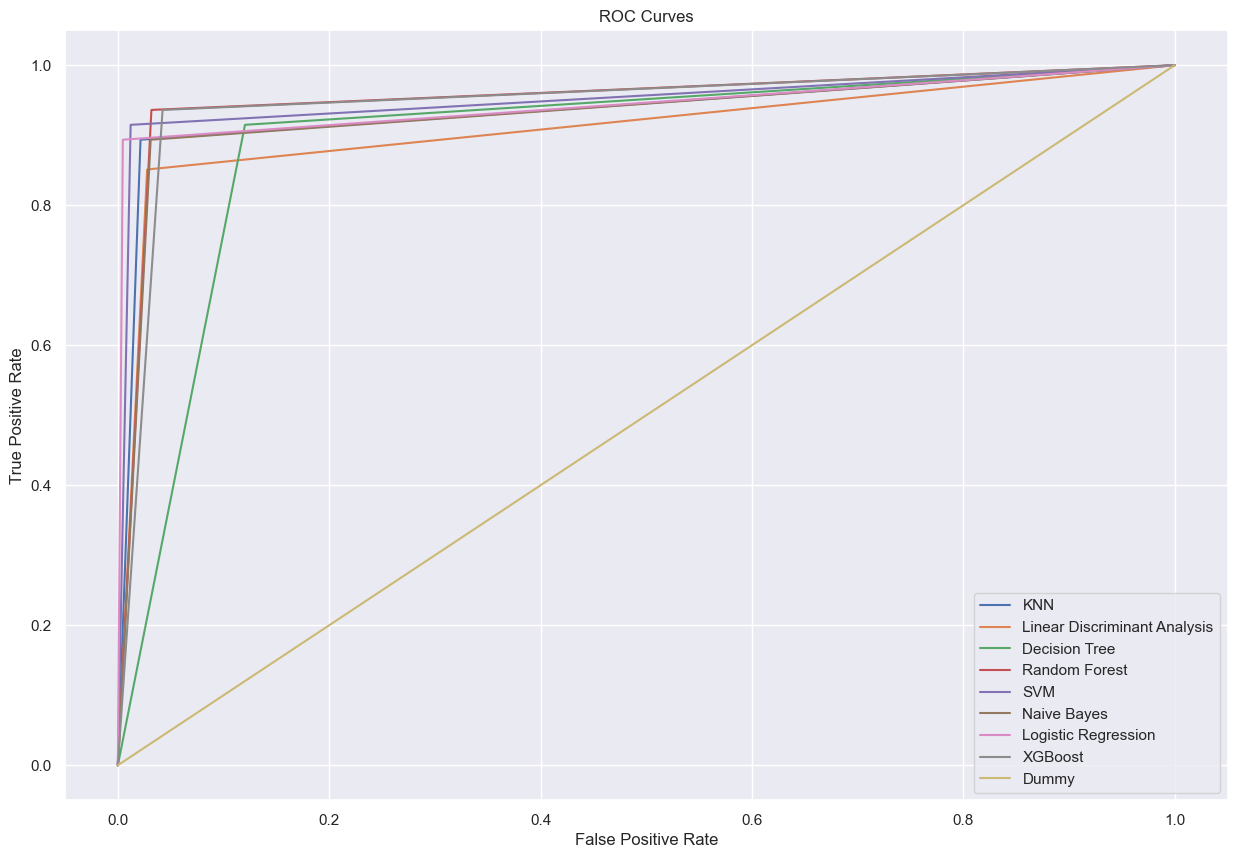

In [257]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test, y_test, models, model_names)

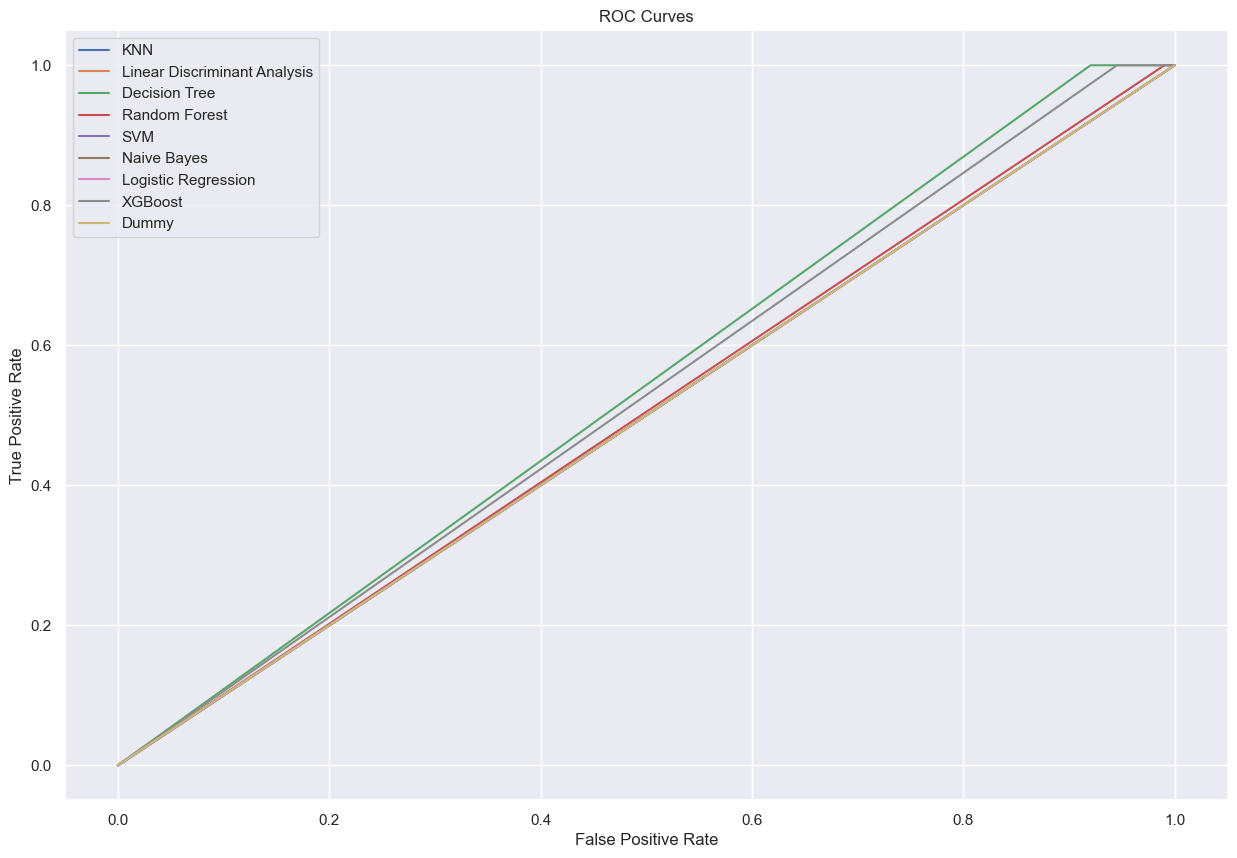

In [258]:
plot_roc_curves(X_val, y_val, models, model_names)

In [259]:
def find_best_threshold(model, X_val, y_val, num_steps):
    """
    Finds the best threshold for a given model on a validation set based on F1 score.

    Parameters:
    model: trained classification model
    X_val (numpy.ndarray or pandas.DataFrame): input features for the validation set
    y_val (numpy.ndarray or pandas.DataFrame): target variable for the validation set
    num_steps (int): number of steps to iterate over the range of thresholds

    Returns:
    tuple: best_threshold, highest_f1, best_acc, best_rec, best_pre
    """
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0

    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_val)[:, 1] >= threshold).astype(int)

        # Calculate various evaluation metrics
        f1 = f1_score(y_val, y_predict)
        acc = accuracy_score(y_val, y_predict)
        rec = recall_score(y_val, y_predict)
        pre = precision_score(y_val, y_predict)

        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre

    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre


* Recall (True Positive Rate): This metric measures the percentage of all fraudulent transactions that the model correctly identifies as fraudulent.
* Precision: This metric indicates the percentage of items that the model labels as fraud that are actually fraudulent.
* False Positive Rate: This metric measures the percentage of non-fraudulent transactions that the model incorrectly labels as fraudulent.
* Accuracy: This metric reflects how often the model is correct in its predictions overall. However, it can be misleading in the case of imbalanced data or fraud detection.
* F1 score: This metric is a combination of precision and recall, taking both false positives and false negatives into account. It's a weighted average of precision and recall and is usually more useful than accuracy, especially when dealing with uneven classes.

In [ ]:
models = [knn,lda_clf,DT_model,rf_model,svm_model,NB_model,logestic_model,xgbc, dummy]
model_names = ['KNN', 'Linear Discriminant Analysis', 'Decision Tree','Random Forest','SVM','Naive Bayes','Logistic Regression','XGBoost', 'Dummy']

chart = []

# Iterate over the models and find the best threshold for each one
for model, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(model, X_val, y_val, num_steps=20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])
    
# Create a pandas dataframe from the chart list and display it
chart_df = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart_df.to_csv('model_evaluation_scores.csv', index=False)
chart_df


Model  Best Threshold  F1 Score  Accuracy    Recall  \
0                           KNN        0.210526  0.004274  0.981751  0.023529   
1  Linear Discriminant Analysis        0.000000  0.003323  0.001664  1.000000   
2                 Decision Tree        0.052632  0.003610  0.081142  1.000000   
3                 Random Forest        0.947368  0.356877  0.996613  0.564706   
4                           SVM        0.000000  0.003323  0.001664  1.000000   
5                   Naive Bayes        0.000000  0.003323  0.001664  1.000000   
6           Logistic Regression        1.000000  0.003330  0.003642  1.000000   
7                       XGBoost        0.947368  0.005688  0.445478  0.952941   
8                         Dummy        0.000000  0.003323  0.001664  1.000000   

   Precision  
0   0.002350  
1   0.001664  
2   0.001808  
3   0.260870  
4   0.001664  
5   0.001664  
6   0.001668  
7   0.002852  
8   0.001664

Epoch 1/10
19/19 [==============================] - 3s 118ms/step - loss: 0.7422 - accuracy: 0.4750 - val_loss: 16.3878 - val_accuracy: 0.9980
Epoch 2/10
19/19 [==============================] - 2s 104ms/step - loss: 0.6678 - accuracy: 0.5967 - val_loss: 16.3665 - val_accuracy: 0.9980
Epoch 3/10
19/19 [==============================] - 2s 107ms/step - loss: 0.6256 - accuracy: 0.6700 - val_loss: 15.4087 - val_accuracy: 0.9979
Epoch 4/10
19/19 [==============================] - 2s 115ms/step - loss: 0.6028 - accuracy: 0.7100 - val_loss: 14.3821 - val_accuracy: 0.9979
Epoch 5/10
19/19 [==============================] - 2s 111ms/step - loss: 0.5730 - accuracy: 0.7433 - val_loss: 12.4867 - val_accuracy: 0.9978
Epoch 6/10
19/19 [==============================] - 2s 111ms/step - loss: 0.5377 - accuracy: 0.7883 - val_loss: 11.6122 - val_accuracy: 0.9977
Epoch 7/10
19/19 [==============================] - 2s 106ms/step - loss: 0.5143 - accuracy: 0.8133 - val_loss: 9.6724 - val_accuracy: 0.9976


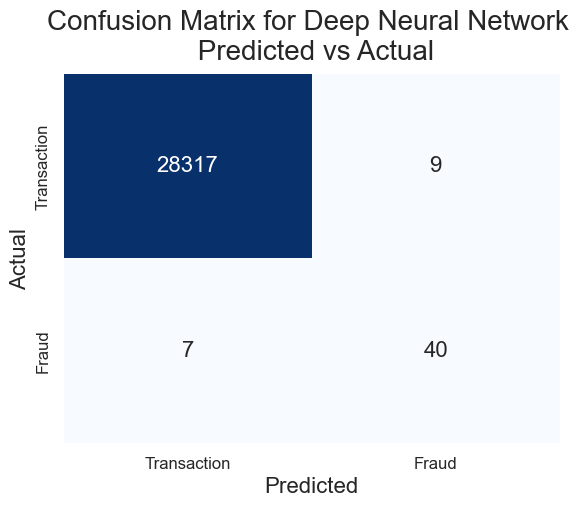

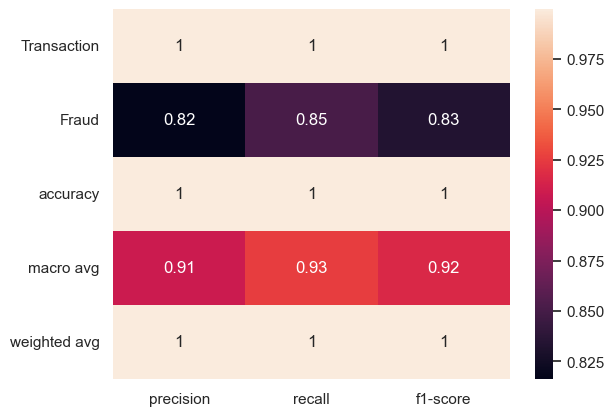

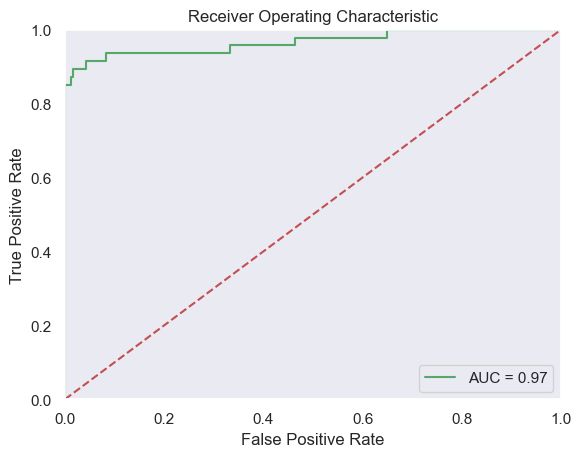

In [263]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
dl_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, acc = dl_model.evaluate(X_test, y_test)

# Generate predictions for the test set
y_pred_prob = dl_model.predict(X_test)

y_pred_prob = dl_model.predict(X_test)[:, 0]



# Make predictions on the test set for each deep learning model
y_pred_dl1 = np.round(dl_model.predict(X_test))

# Compute probabilities for each deep learning model
prob = dl_model.predict(X_test)
# Evaluate performance for each deep learning model
print('Classification Report for Deep Neural Network - MLP Model:')
classification_result('Deep Neural Network',y_test, y_pred_dl1, prob)




In [274]:
def make_confusion_matrix(model, X, y, threshold=0.5, name=""):
    """
    Generates a confusion matrix for a given model on a dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - X: input features for the model
    - y: target variable
    - threshold: threshold for binary classification
    - name: name of the model

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X)[:, 1] >= threshold)

    # Generate confusion matrix
    confusion = confusion_matrix(y, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])

    # Calculate TP, FP, FN, TN
    TP = confusion[0][0]
    FP = confusion[0][1]
    FN = confusion[1][0]
    TN = confusion[1][1]

    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title(f'Confusion Matrix for {name} \n Predicted vs Actual', fontname='Arial', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


In [275]:
models = [knn,lda_clf,DT_model,rf_model,svm_model,NB_model,logestic_model,xgbc, dummy]
model_names = ['KNN', 'Linear Discriminant Analysis', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Logistic Regression', 'XGBoost', 'Dummy']


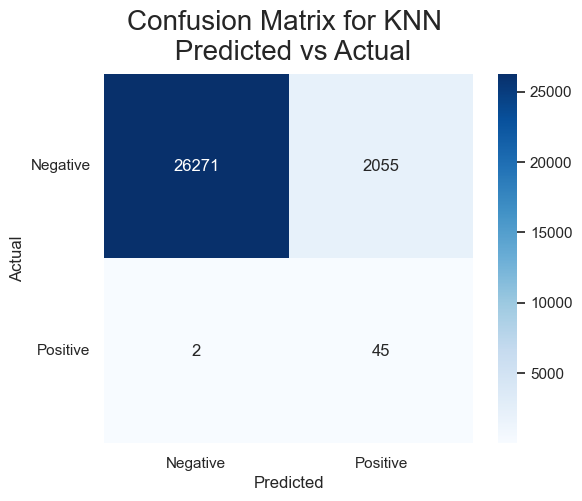

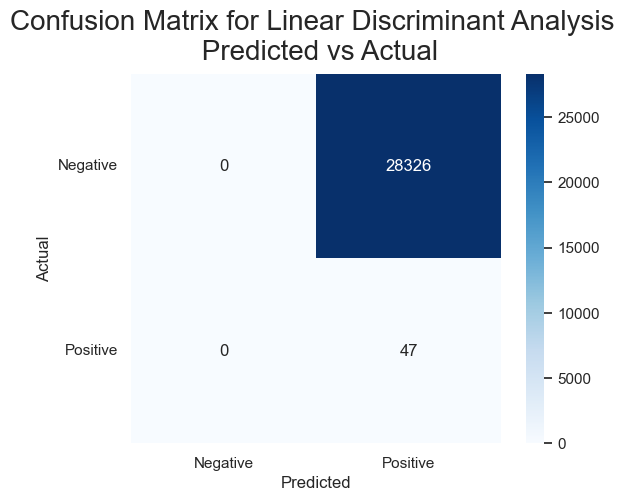

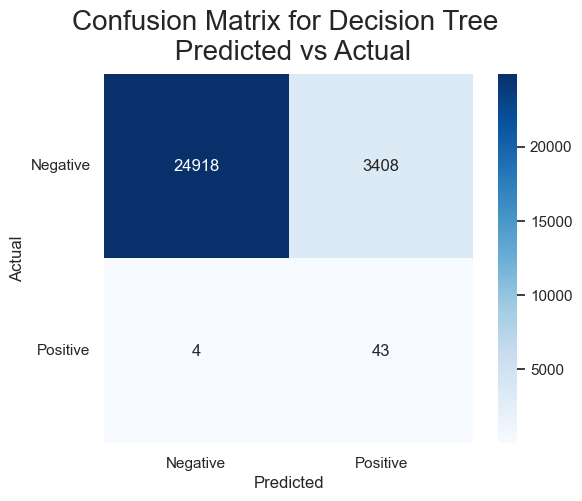

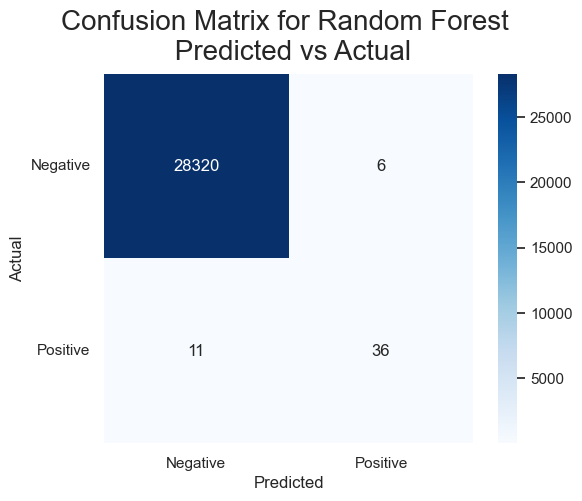

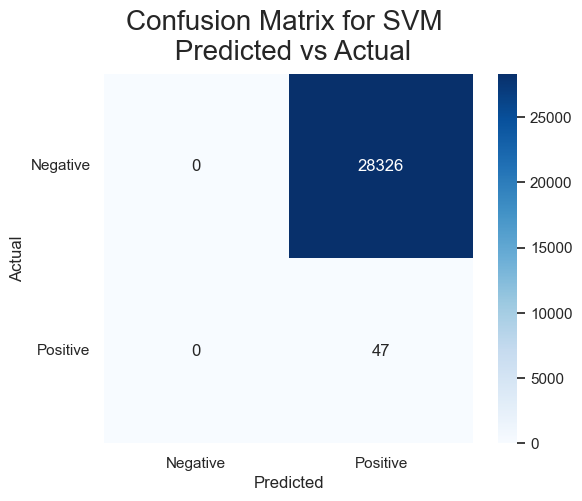

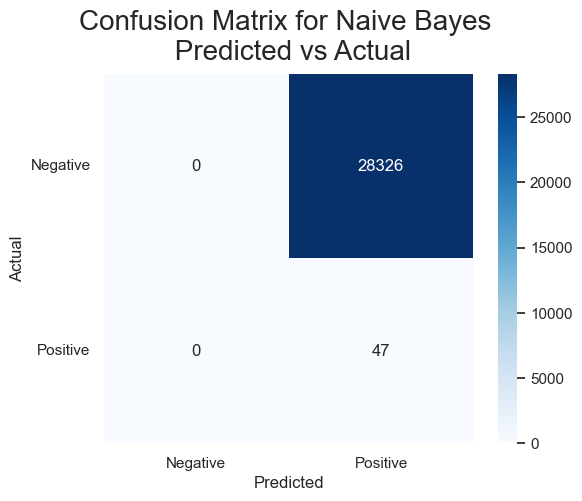

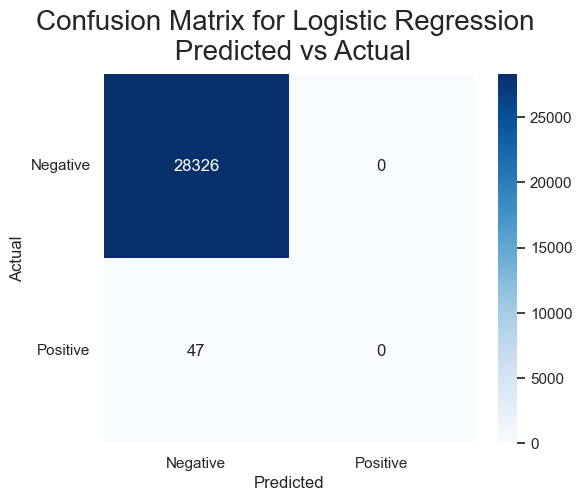

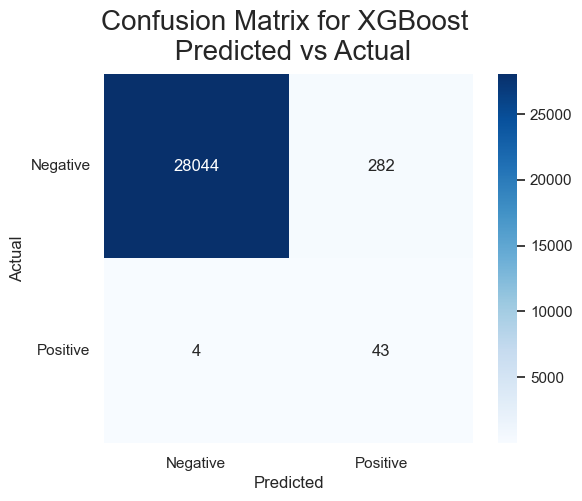

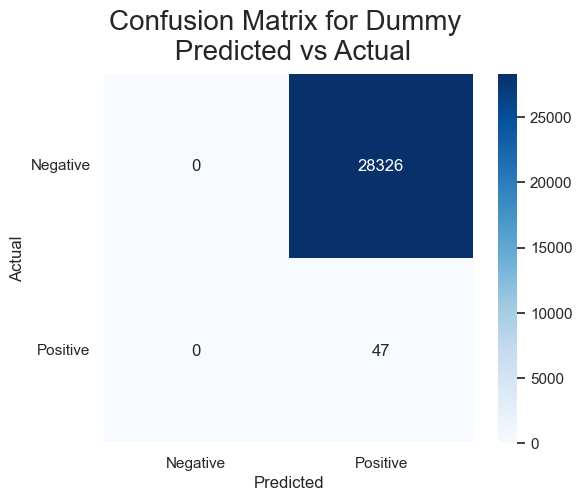

In [276]:
# Iterate over the models and find the best threshold for each one
confusion_matrices = []
for model, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(model, X_val, y_val, 20)
    # Generate a confusion matrix for the model with the best threshold
    make_confusion_matrix(model, X_test, y_test, threshold=best_thresh, name=name)
    # Append the confusion matrix and model name to the list
    confusion_matrices.append([name, best_thresh])


RESULT